# Pre-processing Pipeline

### [Pre-processing - 1] Add embeddings from each paperId

In [1]:
import pandas as pd
import json

# NOTE: Only need to edit this with latest papers JSON for pre-processing steps 1 and 2
# Load in latest JSON files
papers_json_path = r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\knowledge_base\papers\23-07-25_11935_database_update.json'

# load the data from your JSON file
with open(papers_json_path, 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# print out the DataFrame to verify
print(df.head())

                                 id  \
0  https://openalex.org/W1002897494   
1  https://openalex.org/W1010274275   
2  https://openalex.org/W1012054217   
3   https://openalex.org/W101897731   
4  https://openalex.org/W1023696101   

                                            abstract  \
0  Abstract Carbon Capture and Storage is develop...   
1  Searching for efficient solid sorbents for CO2...   
2  The gaseous carbon dioxide incorporation react...   
3                                               None   
4  This paper presents a model to perform energy ...   

                                             authors  citationCount  \
0  [[https://openalex.org/A5054450376, Yasin Ghol...             10   
1  [[https://openalex.org/A5005055697, Guoping Ga...             38   
2  [[https://openalex.org/A5044055674, Chika Haya...             21   
3  [[https://openalex.org/A5030437606, Teng Ben],...              1   
4  [[https://openalex.org/A5067189491, Arun Verma...             20   

 

In [11]:
print("# text not None: ", len(df[df['text'].notna()]), "# None: ", len(df[df['text'].isna()]))

# not None:  1990 # None:  9945


In [13]:
import numpy as np

# Define the conditions for the 'text' column
condition = df['text'].isna()

# Create a subset dataframe where 'text' is NaN
subset_df = df[condition]

# Define what the 'text' column should be if the condition is met
value_when_true = 'Title: ' + subset_df['title'].astype(str) + '. Abstract: ' + subset_df['abstract'].astype(str)

# Define what the 'text' column should be if the abstract is na
value_when_abstract_na = 'Title: ' + subset_df['title'].astype(str) + '.'

# Apply the conditions to the DataFrame
df.loc[condition, 'text'] = np.where(subset_df['abstract'].isna(), value_when_abstract_na, value_when_true)

In [14]:
print("# text not None: ", len(df[df['text'].notna()]), "# None: ", len(df[df['text'].isna()]))

# not None:  11935 # None:  0


In [22]:
df[df['embedding'].notna()]

id  \
0      https://openalex.org/W1002897494   
1      https://openalex.org/W1010274275   
2      https://openalex.org/W1012054217   
3       https://openalex.org/W101897731   
4      https://openalex.org/W1023696101   
...                                 ...   
11437  https://openalex.org/W4253875289   
11443  https://openalex.org/W4256321774   
11445  https://openalex.org/W4256503849   
11880    https://openalex.org/W65938566   
11903   https://openalex.org/W843007777   

                                                abstract  \
0      Abstract Carbon Capture and Storage is develop...   
1      Searching for efficient solid sorbents for CO2...   
2      The gaseous carbon dioxide incorporation react...   
3                                                   None   
4      This paper presents a model to perform energy ...   
...                                                  ...   
11437                                               None   
11443  Ribonucleotide reductases (RNRs) transform RNA...   
11445  Examination of nature's favorite molecules rev...   
11880                                               None   
11903  Abstract Gas adsorption is an important tool f...   

                                                 authors  citationCount  \
0      [[https://openalex.org/A5054450376, Yasin Ghol...             10   
1      [[https://openalex.org/A5005055697, Guoping Ga...             38   
2      [[https://openalex.org/A5044055674, Chika Haya...             21   
3      [[https://openalex.org/A5030437606, Teng Ben],...              1   
4      [[https://openalex.org/A5067189491, Arun Verma...             20   
...                                                  ...            ...   
11437                                               None            935   
11443                                               None            859   
11445                                               None          10718   
11880                                               None           1939   
11903  [[https://openalex.org/A5052174858, Matthias T...          10179   

       citationCount_normalized  \
0                           NaN   
1                           NaN   
2                           NaN   
3                           NaN   
4                           NaN   
...                         ...   
11437                  0.879894   
11443                  0.402237   
11445                 62.365659   
11880                  7.189994   
11903                 58.293005   

                                               citations  \
0      [https://openalex.org/W1753239825, https://ope...   
1      [https://openalex.org/W1966750682, https://ope...   
2      [https://openalex.org/W1973556473, https://ope...   
3      [https://openalex.org/W656376090, https://open...   
4      [https://openalex.org/W1965513514, https://ope...   
...                                                  ...   
11437  https://api.openalex.org/works?filter=cites:W4...   
11443  https://api.openalex.org/works?filter=cites:W4...   
11445  https://api.openalex.org/works?filter=cites:W4...   
11880  https://api.openalex.org/works?filter=cites:W6...   
11903  [https://openalex.org/W1600641482, https://ope...   

                                      classification_ids  \
0                                                   None   
1                                                   None   
2                                                   None   
3                                                   None   
4                                                   None   
...                                                  ...   
11437  [['results of the Endophthalmitis Vitrectomy S...   
11443  [['ribonucleotide reductases, RNA building blo...   
11445                     [['click chemistry', '4.2.1']]   
11880                   [['priority pollutants', '6.2']]   
11903  [['gas adsorption', '2.2.3'], ['surface area',...   

                                   

In [16]:
print("# embedding not None: ", len(df[df['embedding'].notna()]), "# None: ", len(df[df['embedding'].isna()]))

# embedding not None:  1990 # None:  9945


In [18]:
# Add embeddings based on text column for new rows
import torch
from transformers import AutoTokenizer, AutoModel

# Load pretrained model/tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/specter")
model = AutoModel.from_pretrained("allenai/specter")

In [27]:
# Function to get SPECTER embedding
def get_specter_embedding(text):
    # Tokenize text
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')

    # Generate embedding
    with torch.no_grad():
        embedding = model(**inputs)[0].mean(dim=1).squeeze()

    # Convert tensor to numpy array
    embedding_np = embedding.numpy()

    return str(embedding_np.tolist())

# Get indices where 'embedding' is None
embedding_isna_indices = df[df['embedding'].isna()].index
max_index = embedding_isna_indices.max()

# Compute SPECTER embeddings for these rows and store in 'embedding' column
for i, idx in enumerate(embedding_isna_indices):
    print(f"idx {idx} / {max_index}")
    df.loc[idx, 'embedding'] = get_specter_embedding(df.loc[idx, 'text'])

idx 128 / 11934
idx 129 / 11934
idx 130 / 11934
idx 131 / 11934
idx 132 / 11934
idx 133 / 11934
idx 134 / 11934
idx 135 / 11934
idx 136 / 11934
idx 137 / 11934
idx 138 / 11934
idx 139 / 11934
idx 140 / 11934
idx 141 / 11934
idx 142 / 11934
idx 143 / 11934
idx 144 / 11934
idx 145 / 11934
idx 146 / 11934
idx 147 / 11934
idx 148 / 11934
idx 149 / 11934
idx 150 / 11934
idx 151 / 11934
idx 152 / 11934
idx 154 / 11934
idx 155 / 11934
idx 156 / 11934
idx 157 / 11934
idx 158 / 11934
idx 159 / 11934
idx 161 / 11934
idx 162 / 11934
idx 163 / 11934
idx 164 / 11934
idx 165 / 11934
idx 166 / 11934
idx 167 / 11934
idx 168 / 11934
idx 169 / 11934
idx 170 / 11934
idx 171 / 11934
idx 172 / 11934
idx 173 / 11934
idx 174 / 11934
idx 175 / 11934
idx 177 / 11934
idx 178 / 11934
idx 179 / 11934
idx 180 / 11934
idx 181 / 11934
idx 182 / 11934
idx 185 / 11934
idx 186 / 11934
idx 187 / 11934
idx 188 / 11934
idx 189 / 11934
idx 190 / 11934
idx 192 / 11934
idx 193 / 11934
idx 194 / 11934
idx 195 / 11934
idx 196 

KeyboardInterrupt: 

In [28]:
print("# embedding not None: ", len(df[df['embedding'].notna()]), "# None: ", len(df[df['embedding'].isna()]))

# embedding not None:  3839 # None:  8096


### [Pre-processing - 2] Generating a T-SNE x, y coordinates from embeddings

In [29]:
print("# x not None: ", len(df[df['x'].notna()]), "# None: ", len(df[df['x'].isna()]))

# x not None:  1990 # None:  9945


converting all embeddings to lists


C:\Users\1kevi\AppData\Local\Temp\ipykernel_23700\2921454014.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['embedding'] = df_temp['embedding'].apply(lambda x: np.array(ast.literal_eval(x)))


computing tsne
updating df


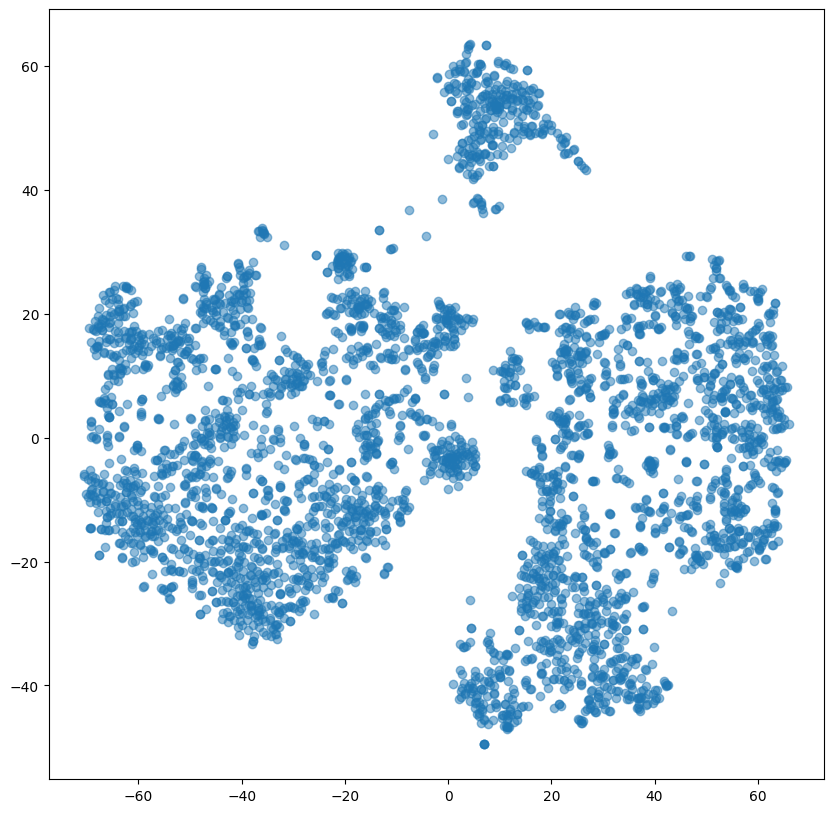

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import ast

# Create a temporary DataFrame with only rows where 'embedding' is not NaN
df_temp = df[df['embedding'].notna()]

# Convert string of list to numpy array
# TODO: this is probably a very slow step to convert strings to lists
print("converting all embeddings to lists")
df_temp['embedding'] = df_temp['embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Stack all embeddings into a numpy array
embeddings = np.vstack(df_temp['embedding'])

# Compute t-SNE
print("computing tsne")
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# Update 'x' and 'y' in the original DataFrame for rows that have embeddings
print("updating df")
df.loc[df_temp.index, 'x'] = embeddings_2d[:, 0]
df.loc[df_temp.index, 'y'] = embeddings_2d[:, 1]

# Create a scatter plot of all the points with node sizes based on normalized citationCount
plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], alpha=0.5, label='All papers')
plt.show()


In [34]:
from datetime import datetime

# Get today's date
now = datetime.now()
date_str = now.strftime('%y-%m-%d')
time_str = now.strftime('%H-%M-%S')
folder_path = f'papers/{date_str}'
n = len(papers.keys())
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df.to_json(f'{folder_path}/{time_str}_tsne_output_{df.shape[0]}.json', orient='records')

In [33]:
print("# x not None: ", len(df[df['x'].notna()]), "# None: ", len(df[df['x'].isna()]))

# x not None:  3839 # None:  8096


### (Skip for now) Generating edges from embedding similarity & direct citations

In [ ]:
import pandas as pd
import json

# load the data from your JSON file
with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\data_collection\openalex\extracted_results_with_embeddings.json', 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)
df['paperId'] = df['id']
df = df[df['embedding'].apply(lambda x: len(x) != 0)] # drop empty embeddings

# print out the DataFrame to verify
print(df.head())

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.preprocessing import MinMaxScaler
import json


In [17]:
# Get embedding distances

# Extract 'vector' from 'embedding' and convert to DataFrame
embedding_df = pd.DataFrame(df['embedding'].tolist())
embedding_df = embedding_df.dropna()

# Compute the cosine distances
distances = cosine_distances(embedding_df)

# Initialize a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

# Reshape distances to a 1D array and scale
distances_scaled = scaler.fit_transform(distances.reshape(-1, 1))

# Reshape back to original shape
distances_scaled = distances_scaled.reshape(distances.shape)


In [20]:
# Initialize lists to store the edges data
source = []
target = []
weights = []

# Iterate over the distances matrix
for i in range(distances.shape[0]):
    for j in range(i+1, distances.shape[1]):  # j starts from i+1 to avoid duplicate edges and self-edges
        source.append(df.iloc[i]['paperId'])
        target.append(df.iloc[j]['paperId'])
        weights.append(distances_scaled[i, j])

# Create the edges DataFrame
edges_df = pd.DataFrame({'id': range(len(source)), 'weight': weights, 'source': source, 'target': target})

# 14m for 2000 nodes

In [21]:
# Convert the DataFrame to a JSON string
edges_json = edges_df.to_json(orient='records', indent=4)

# Dump in JSON
with open('edges/edges_2000.json', 'w') as f:
    f.write(edges_json)

# Convert the JSON string to a dictionary
edges_dict = json.loads(edges_json)


In [36]:
# Code for creating edges based on direct citations
df["citations"]

0       https://api.openalex.org/works?filter=cites:W2...
1       https://api.openalex.org/works?filter=cites:W2...
2       https://api.openalex.org/works?filter=cites:W2...
3       https://api.openalex.org/works?filter=cites:W2...
4       https://api.openalex.org/works?filter=cites:W2...
                              ...                        
1994    https://api.openalex.org/works?filter=cites:W2...
1995    https://api.openalex.org/works?filter=cites:W2...
1996    https://api.openalex.org/works?filter=cites:W1...
1997    https://api.openalex.org/works?filter=cites:W1...
1998    https://api.openalex.org/works?filter=cites:W1...
Name: citations, Length: 1990, dtype: object

### Using LLMs for topic-based clustering

In [35]:
# [GPT Topic Labeling - 3]

import pandas as pd
import json

# Load in latest papers file
papers_json_path = r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\knowledge_base\papers\23-07-25_11935_tsne_output.json'

# load the data from your JSON file
with open(papers_json_path, 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# print out the DataFrame to verify
print(df.head())

                                 id  \
0  https://openalex.org/W1002897494   
1  https://openalex.org/W1010274275   
2  https://openalex.org/W1012054217   
3   https://openalex.org/W101897731   
4  https://openalex.org/W1023696101   

                                            abstract  \
0  Abstract Carbon Capture and Storage is develop...   
1  Searching for efficient solid sorbents for CO2...   
2  The gaseous carbon dioxide incorporation react...   
3                                               None   
4  This paper presents a model to perform energy ...   

                                             authors  citationCount  \
0  [[https://openalex.org/A5054450376, Yasin Ghol...             10   
1  [[https://openalex.org/A5005055697, Guoping Ga...             38   
2  [[https://openalex.org/A5044055674, Chika Haya...             21   
3  [[https://openalex.org/A5030437606, Teng Ben],...              1   
4  [[https://openalex.org/A5067189491, Arun Verma...             20   

 

In [57]:
# [GPT Topic Labeling - 2] Using GPT3.5 to generate topics
# Improvement: add rate limiting error handling so you don't hardcode the wait time

# imports
%reload_ext dotenv
%dotenv
import os
import openai
openai.api_key = os.getenv("OPENAI_GPT4_API_KEY")
# openai.api_key = os.getenv("OPENAI_API_KEY")


# models
EMBEDDING_MODEL = "text-embedding-ada-003"
# GPT_MODEL = "gpt-3.5-turbo"
GPT_MODEL = "gpt-4"

# for bulk openai message, no stream
def chat_openai(prompt="Tell me to ask you a prompt", model=GPT_MODEL, chat_history=[]):
    # define message conversation for model
    if chat_history:
        messages = chat_history
    else:
        messages = [
            {"role": "system", "content": "You are an educated carbon capture research consultant and a generally educated and helpful researcher and programmer. Answer as correctly, clearly, and concisely as possible."},
        ]
    messages.append({"role": "user", "content": prompt})

    # create the chat completion
    print("Prompt: ", prompt)
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0
    )
    print("Completion info: ", completion)
    text_answer = completion["choices"][0]["message"]["content"]

    # updated conversation history
    messages.append({"role": "assistant", "content": text_answer})

    return text_answer, messages

#### 1. Seeding – Ask GPT4 to be a domain expert and use “expert knowledge” to seed an initial taxonomy definition of main classes, subclasses, and divisions

In [633]:
seed_initial_taxonomy_prompt = '''
Create a taxonomy of all carbon capture research areas. Be as mutually exclusive, completely exhaustive (MECE) and concise as possible. Be sure to also include a "General" category for information like literature reviews and updates, a "Miscellaneous" category for concepts that have yet to be covered by an appropriate category and non-carbon capture related concepts, and use multilevel numbering. Create as many levels breadth-wise and depth-wise as appropriate.
'''

In [634]:
res = chat_openai(seed_initial_taxonomy_prompt)
res[0]

Prompt:  
Create a taxonomy of all carbon capture research areas. Be as mutually exclusive, completely exhaustive (MECE) and concise as possible. Be sure to also include a "General" category for information like literature reviews and updates, a "Miscellaneous" category for concepts that have yet to be covered by an appropriate category and non-carbon capture related concepts, and use multilevel numbering. Create as many levels breadth-wise and depth-wise as appropriate.

Completion info:  {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "1. General\n   1.1 Literature Reviews\n   1.2 Updates and News\n   1.3 General Theory and Principles\n\n2. Carbon Capture Technologies\n   2.1 Pre-combustion Capture\n      2.1.1 Gasification\n      2.1.2 Shift Reaction\n      2.1.3 CO2 Separation\n   2.2 Post-combustion Capture\n      2.2.1 Chemical Absorption\n      2.2.2 Physical Absorption\n      2.2.3 Membrane Separation\n   2.3 Oxy-fue

'1. General\n   1.1 Literature Reviews\n   1.2 Updates and News\n   1.3 General Theory and Principles\n\n2. Carbon Capture Technologies\n   2.1 Pre-combustion Capture\n      2.1.1 Gasification\n      2.1.2 Shift Reaction\n      2.1.3 CO2 Separation\n   2.2 Post-combustion Capture\n      2.2.1 Chemical Absorption\n      2.2.2 Physical Absorption\n      2.2.3 Membrane Separation\n   2.3 Oxy-fuel Combustion\n      2.3.1 Oxygen Production\n      2.3.2 Combustion and Flue Gas Recycle\n      2.3.3 CO2 Separation\n   2.4 Direct Air Capture\n      2.4.1 Chemical Processes\n      2.4.2 Physical Processes\n   2.5 Bio-energy with Carbon Capture and Storage (BECCS)\n      2.5.1 Biomass Production and Conversion\n      2.5.2 CO2 Capture and Storage\n\n3. Carbon Storage and Sequestration\n   3.1 Geological Storage\n      3.1.1 Oil and Gas Reservoirs\n      3.1.2 Unmineable Coal Seams\n      3.1.3 Deep Saline Formations\n   3.2 Ocean Storage\n   3.3 Mineral Carbonation\n   3.4 Terrestrial Sequestrati

In [ ]:
initial_taxonomy = res[0]
print(initial_taxonomy)

In [140]:
# jsonify_taxonomy_prompt = f'''
# {initial_taxonomy}

# Put the above hierarchy of categories and sub-categories into a JSON format of 1. unique id (integer), 2. name of the category, 3. layer in the hierarchy (integer), and 4. content (a list of subcategories) 

# The output should be of this format: [
#     {{
#         "cluster_id": 0,
#         "name": "General"
#         "layer": 0,
#         "content": [...],
#     }}
# ]
# '''

#### [Pre-processing - 3] 2. Initial categorization – Use GPT3.5 to look at 1) the seeded taxonomy and 2) paper titles and abstracts, 3) categorize the paper title and abstract and adapt the seeded taxonomy as necessary.

In [ ]:
# Pre-processing step 1 and df should've already updated the text column and there should already be a classification_ids column
# # [GPT Topic Labeling - 3] Create a new text column
# df['text'] = df.apply(lambda row: 'Title: ' + row['title'] + '.' if pd.isna(row['abstract']) else 'Title: ' + row['title'] + '. Abstract: ' + row['abstract'], axis=1)

# # [GPT Topic Labeling - 4]
# df['classification_ids'] = pd.Series(dtype='object')
# # df.head()

In [8]:
# [GPT Topic Labeling - 4.5, see everything for debugging]
pd.set_option('display.max_rows', None)

In [69]:
def retrieve_update_taxonomy_extract_keywords_prompt(taxonomy, papers):
    update_taxonomy_extract_keywords_prompt = f'''
Task:
The task is to 1) update the taxonomy of all carbon capture research by re-arranging or adding new categories and levels as appropriate and 2) correctly extract the most relevant and important paper text keywords to use them to classify each paper below into its top 3 matching categories in the updated taxonomy. 

Rules and Instructions:
1. For the taxonomy, be as mutually exclusive, completely exhaustive (MECE) and concise as possible. Try to avoid repetition and overlap. 
2. Ensure that the taxonomy is readable and not overwhelming. Try to model the taxonomy to reflect the usabilty and usefulness of great classification systems like Dewey Decimal System and Library of Congress Classification.
3. Use a hierarchical structure to manage the breadth and depth of the categories effectively, with the broadest categories at top and these categories becoming more specific as you go down the hierarchy. A general rule of thumb is to have around 10 top-level categories and 10 sub-categories for every parent category.
4. For paper keyword extraction and classification, be as accurate and grounded in the extracted paper text keywords as possible. 

Papers (id : text): 
{papers}

Input Taxonomy (category id : category name):
{taxonomy}

The output should be in the format of: 
1. "UPDATED TAXONOMY: " -- a readable and updated MECE multilevel taxonomy with any re-arrangement of categories or new categories and levels added.

2. "PAPER CLASSIFICATION: 
    [
        paper id : [[paper text keywords, corresponding category id], [paper text keywords, corresponding category id], etc.], 
        paper id : [[paper text keywords, corresponding category id], etc.], 
        etc.
    ]" 
    -- a JSON of each paper id with a relevance ranked list of paper text keywords and corresponding category id, with everything being strings. Rank by most to least relevant category to so that anyone looking for all papers about a category can find the most relevant papers to the category.
'''
    return update_taxonomy_extract_keywords_prompt

In [70]:
def retrieve_taxonomy_mapping_prompt(old_taxonomy, new_taxonomy):
    retrieve_taxonomy_mapping_prompt = f'''
Task:
The task is to match each Input Taxonomy category id to its closest Updated Taxonomy category id based on category names.

Rules:
1. Be as clear and correct as possible.

Input Taxonomy (id : name):
{old_taxonomy}

Updated Taxonomy (id : name):
{new_taxonomy}

The output should be in the following JSON format: 
"UPDATED CATEGORY IDS: [
{{ Input Taxonomy category id : Updated Taxonomy category id}},
{{ Input Taxonomy category id : Updated Taxonomy category id}},
etc.]" 
-- List every category id in Input Taxonomy and its closest category id in Updated Taxonomy based on category name.
'''
    return retrieve_taxonomy_mapping_prompt

In [68]:
# Trying token-optimizing keyword classification instead of paper
def retrieve_classify_keywords_prompt(taxonomy, keywords):
    classify_keywords_prompt = f'''
Task:
The task is to 1) update the taxonomy of all carbon capture research by re-arranging or adding new categories and levels as appropriate and 2)  use paper keywords to classify each paper id below into its top 3 matching categories in the updated taxonomy. 

Rules and Instructions:
1. For the taxonomy, be as mutually exclusive, completely exhaustive (MECE) and concise as possible. Try to avoid repetition and overlap. 
2. Ensure that the taxonomy is readable and not overwhelming. Try to model the taxonomy to reflect the usability and usefulness of great classification systems like Dewey Decimal System and Library of Congress Classification.
3. Use a hierarchical structure to manage the breadth and depth of the categories effectively, with the broadest categories at top and these categories becoming more specific as you go down the hierarchy. A general rule of thumb is to have around 10 top-level categories and 10 sub-categories for every parent category. Feel free to use as many depth levels as appropriate.
4. For paper keyword classification, be as accurate and grounded in the paper keywords as possible. 

Papers (id : keywords): 
{keywords}

Input Taxonomy (category id : category name):
{taxonomy}

The output should be in the format of: 
1. "UPDATED TAXONOMY: " -- a readable and updated MECE multilevel taxonomy with any re-arrangement of categories or new categories and levels added.

2. "PAPER CLASSIFICATION: 
[
    paper id : [[paper keywords, corresponding category id], [paper text keywords, corresponding category id], etc.], 
    paper id : [[paper keywords, corresponding category id], etc.], 
    etc.
]" 
-- a JSON of each paper id with a list of its paper keywords and corresponding Updated Taxonomy category id, with everything being strings.
'''

    return classify_keywords_prompt

In [67]:
# [GPT Topic Labeling - 6] Putting everything together to iterate through all papers, update and save taxonomy, and add category ids to each paper
import pandas as pd
import json
import re
import ast  # The Abstract Syntax Trees module

def extract_valid_json_string(json_str):
    print("EXTRACTING VALID JSONS FROM ", json_str)
    closing_brace_indices = [i for i, char in enumerate(json_str) if char == "}"]
    for index in reversed(closing_brace_indices):
        test_str = json_str[:index+1] + "]"
        try:
            json.loads(test_str)
            return test_str
        except json.JSONDecodeError:
            continue
    return None

def extract_taxonomy_and_classification(chat_output):
    # print("THIS IS CHAT OUTPUT IN EXTRACT TAXONOMY AND CLASSIFICATION: ", chat_output)

    # Extracting taxonomy
    taxonomy_start = chat_output.find('UPDATED TAXONOMY:') + len('UPDATED TAXONOMY:')
    taxonomy_end = chat_output.find('PAPER CLASSIFICATION:')
    updated_taxonomy = chat_output[taxonomy_start:taxonomy_end].strip()

    # Extracting paper classifications
    end_index = chat_output.rfind(']')
    classification_str = chat_output[taxonomy_end+len('PAPER CLASSIFICATION:'):end_index+1].strip()

    # Iterate through each line until one ending with ']]' is found
    valid_classification_str = ""
    classification_dict = {}
    for line in classification_str.splitlines():
        print("Line: ", line)
        if line.strip().endswith(']],'):
            key, value = line.split(":", 1)
            end_line_index = value.rfind(',')
            classification_dict[key.strip().strip('"')] = value[:end_line_index].strip()
        elif line.strip().endswith(']]'):
            key, value = line.split(":", 1)
            end_line_index = value.rfind(']')
            classification_dict[key.strip().strip('"')] = value[:end_line_index+1].strip()
    
    print("classification_dict", classification_dict)
    return updated_taxonomy, classification_dict

def extract_taxonomy_mapping(chat_output):
    print("THIS IS CHAT OUTPUT EXTRACT TAXONOMY MAPPING: ", chat_output)

    # Extracting changed category IDs
    changed_category_start = chat_output.find('[')
    changed_category_end = chat_output.rfind(']')
    print("changed_category_start", changed_category_start, "changed_category_end", changed_category_end)
    changed_category_ids_str = chat_output[changed_category_start:changed_category_end+1].strip()
    print("changed_category_ids_str", changed_category_ids_str)

    if changed_category_ids_str and (changed_category_ids_str[0] == '[' and changed_category_ids_str[-1] == ']'):
        changed_category_ids = json.loads(changed_category_ids_str)
        changed_category_ids_dict = {list(d.keys())[0]: list(d.values())[0] for d in changed_category_ids}
    else:
        changed_category_ids_dict = {}

    print("\nchanged changed_category_ids_dict: ", changed_category_ids_dict)
    return changed_category_ids_dict

In [ ]:
# debugging the extract taxonomy and classification for reordering

chat_output = '''
UPDATED TAXONOMY:


'''

extract_taxonomy_and_classification(chat_output)

In [597]:
# [GPT Topic Labeling - 7] read and update BOTH df and numbered_taxonomy from last checkpoint or initial taxonomy
import pandas as pd
# df = pd.read_csv('checkpoints/gpt4_papers_100.csv')
with open('checkpoints/gpt4_2000/taxonomy_0_64.txt', 'r') as f:
    numbered_taxonomy = f.read()

In [141]:
import numpy as np
import ast

def update_classification_ids(classification_ids, changed_category_ids):
    print("classification_ids", classification_ids)

    # Parse string into actual list if necessary
    if isinstance(classification_ids, str):
        classification_ids = ast.literal_eval(classification_ids)

    # Check if the classification id exists in changed_category_ids. If it does, replace it
    # If classification_ids is NaN, skip over it
    if (classification_ids is np.nan) or (not classification_ids):
        return classification_ids
    
    res = []
    for item in classification_ids:
        if len(item) > 1:
            if item[1] in changed_category_ids:
                res.append([item[0], changed_category_ids[item[1]]])
            else:
                res.append(item)

    return res

In [60]:
print("# classification not None: ", len(df[df['classification_ids'].notna()]), "# None: ", len(df[df['classification_ids'].isna()]))

# classification not None:  1990 # None:  9945


In [93]:
# [GPT Topic Labeling - 8]
import time
from datetime import datetime

def process_papers(df, numbered_taxonomy):
    # Typically 16000 is good for 8K max tokens
    TOTAL_PROMPT_TOKENS = 2500
    CHARS_PER_TEXT = 250
    NUM_BATCHES = TOTAL_PROMPT_TOKENS / CHARS_PER_TEXT # should be more than enough

    now = datetime.now()
    date_str = now.strftime('%y-%m-%d')
    time_str = now.strftime('%H-%M-%S')
    if not os.path.exists(f'clusters/{date_str}'):
        os.makedirs(f'clusters/{date_str}')
    if not os.path.exists(f'papers/{date_str}'):
        os.makedirs(f'papers/{date_str}')

    for i in range(0, int(NUM_BATCHES)):
        print(f"--- ITERATION {i} ---")
        subset = df.loc[df['classification_ids'].isna(), 'paperId':'text']
        min_idx = subset.index.min()
        if subset.empty:
            print("subset was all classified!")
            return
        print("Checking rows starting from", subset.index.min(), " num paper tokens to use: ", TOTAL_PROMPT_TOKENS - len(numbered_taxonomy))
        print("df", df['classification_ids'][min_idx-100:min_idx + 100], "numbered_taxonomy", numbered_taxonomy)
        
        # Create dictionary mapping index to paperId and add as many papers up to TOTAL_PROMPT_TOKENS
        index_to_paperId = {i: row['paperId'] for i, (_, row) in enumerate(subset.iterrows())}
        papers = {}
        total_length = 0
        for i, (_, row) in enumerate(subset.iterrows()):
            text = row['text'][:CHARS_PER_TEXT]
            if total_length + len(text) > TOTAL_PROMPT_TOKENS - len(numbered_taxonomy):
                break 
            papers[i] = text
            total_length += len(text)
        papers_processed = ""
        for index in papers.keys():
            papers_processed += f"{index} : {papers[index]}\n"

        # Call OpenAI API to update taxonomy and classify papers
        update_taxonomy_classify_papers_prompt = retrieve_update_taxonomy_extract_keywords_prompt(numbered_taxonomy, papers_processed)
        res = chat_openai(update_taxonomy_classify_papers_prompt)
        updated_taxonomy, paper_classification = extract_taxonomy_and_classification(res[0])
        print("updated taxonomy: ", updated_taxonomy, "paper classification: ", paper_classification)

        # Ensure that you update all previously classified papers' classification ids with the new taxonomy
        taxonomy_mapping_prompt = retrieve_taxonomy_mapping_prompt(numbered_taxonomy, updated_taxonomy)
        res = chat_openai(taxonomy_mapping_prompt)  # call to OpenAI API
        print("Map taxonomies result: ", res[0])
        changed_category_ids = extract_taxonomy_mapping(res[0])
        print("changed category ids: ", changed_category_ids)
    
        # update classification_ids from paper_classification using index_to_paperId
        for idx, class_ids in paper_classification.items():
            paper_id = index_to_paperId[int(idx)]
            df.loc[df['paperId'] == paper_id, 'classification_ids'] = df.loc[df['paperId'] == paper_id, 'classification_ids'].apply(lambda x: class_ids)
            
        # check and update for any changed paper classification ids because of updated taxonomy
        df['classification_ids'] = df['classification_ids'].apply(update_classification_ids, args=(changed_category_ids,))

        # save the taxonomy and df to a txt and csv file
        n = len(papers.keys())

        with open(f'clusters/{date_str}/{time_str}_{df.shape[0]}_{min_idx}_{n}.txt', 'w') as f:
            f.write(updated_taxonomy)
        df.to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_{min_idx}_{n}.json', orient='records')
        df[['title', 'classification_ids']].to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_{min_idx}_{n}_manual_analysis.json', orient='records', indent=2)
        
        numbered_taxonomy = updated_taxonomy

    return df, numbered_taxonomy

In [143]:
# [GPT Topic Labeling - 9.5] read and update BOTH df and numbered_taxonomy from last checkpoint or initial taxonomy
import pandas as pd

# load the df
with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\knowledge_base\papers\latest_papers.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\knowledge_base\clusters\latest_taxonomy.txt', 'r') as f:
    numbered_taxonomy = f.read()

In [94]:
# [GPT Topic Labeling - 9]
df, numbered_taxonomy = process_papers(df, numbered_taxonomy)

# 159 min for 2000 papers, batch size of 40

--- ITERATION 0 ---
Checking rows starting from 2  num paper tokens to use:  696
df Series([], Name: classification_ids, dtype: object) numbered_taxonomy 1. General
   1.1 Literature Reviews
   1.2 Updates on Carbon Capture Research
   1.3 General Carbon Capture Concepts

2. Carbon Capture Technologies
   2.1 Pre-combustion Capture
       2.1.1 Gasification
       2.1.2 Water-gas Shift Reaction
       2.1.3 Physical Solvents
       2.1.4 Chemical Solvents
   2.2 Post-combustion Capture
       2.2.1 Chemical Absorption
       2.2.2 Physical Absorption
       2.2.3 Membrane Separation
   2.3 Oxy-fuel Combustion
       2.3.1 Cryogenic Separation
       2.3.2 Chemical Looping Combustion
   2.4 Direct Air Capture
       2.4.1 Chemical Absorption
       2.4.2 Physical Absorption
       2.4.3 Solid Sorbents
   2.5 Bio-energy with Carbon Capture and Storage (BECCS)
       2.5.1 Biomass Gasification
       2.5.2 Biomass Combustion
   2.6 Carbon Mineralization
       2.6.1 In-situ Mineralization

KeyboardInterrupt: 

In [130]:
print(df['classification_ids'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
11930     True
11931     True
11932     True
11933     True
11934     True
Name: classification_ids, Length: 11935, dtype: bool


In [135]:
# Test: keyword classification
# [GPT Topic Labeling - 8]
import time
import ast

def process_keywords(df, numbered_taxonomy):
    try:
        # Typically 16000 is good for 8K max tokens
        TOTAL_PROMPT_TOKENS = 5000
        CHARS_PER_TEXT = 250
        NUM_BATCHES = TOTAL_PROMPT_TOKENS / CHARS_PER_TEXT # should be more than enough

        now = datetime.now()
        date_str = now.strftime('%y-%m-%d')
        time_str = now.strftime('%H-%M-%S')
        if not os.path.exists(f'clusters/{date_str}'):
            os.makedirs(f'clusters/{date_str}')
        if not os.path.exists(f'papers/{date_str}'):
            os.makedirs(f'papers/{date_str}')

        for i in range(0, int(NUM_BATCHES)):
            print(f"--- ITERATION {i} ---")
            # only select rows that don't have keyword classification ids yet but have classification_ids (keywords have been extracted)
            subset_cols = df[['paperId', 'classification_ids']]
            subset = subset_cols[subset_cols['classification_ids'].apply(lambda x: type(x) == list)]
            min_idx = subset.index.min()
            if subset.empty:
                print("subset was all classified!")
                return
            
            print("Checking rows starting from", subset.index.min(), " num paper tokens to use: ", TOTAL_PROMPT_TOKENS - len(numbered_taxonomy))
            print("df", df['classification_ids'][min_idx-50:min_idx + 50], "numbered_taxonomy", numbered_taxonomy)
            
            # Create dictionary mapping index to paperId and add as many paper keywords up to TOTAL_PROMPT_TOKENS
            index_to_paperId = {i: row['paperId'] for i, (_, row) in enumerate(subset.iterrows())}
            papers = {}
            total_length = 0
            for i, (_, row) in enumerate(subset.iterrows()):
                classification_ids = row['classification_ids']
                keywords = str([item[0] for item in classification_ids])
                # 10K for GPT3.5, 15K for GPT4
                if total_length + len(keywords) > TOTAL_PROMPT_TOKENS - len(numbered_taxonomy): 
                    break 
                papers[i] = keywords
                total_length += len(keywords)
            papers_processed = ""
            for index in papers.keys():
                papers_processed += f"{index} : {papers[index]}\n"

            # Call OpenAI API to update taxonomy and classify papers
            update_taxonomy_prompt = retrieve_classify_keywords_prompt(numbered_taxonomy, papers_processed)
            res = chat_openai(update_taxonomy_prompt)
            updated_taxonomy, paper_classification = extract_taxonomy_and_classification(res[0])
            print("updated taxonomy: ", updated_taxonomy)
            print("paper classification: ", paper_classification)

            # Ensure that you update all previously classified papers' classification ids with the new taxonomy
            taxonomy_mapping_prompt = retrieve_taxonomy_mapping_prompt(numbered_taxonomy, updated_taxonomy)
            res = chat_openai(taxonomy_mapping_prompt)
            print("Map taxonomies result: ", res[0])
            changed_category_ids = extract_taxonomy_mapping(res[0])
            print("changed category ids: ", changed_category_ids)

            # update keyword_classification_ids using index_to_paperId
            for idx, class_ids in paper_classification.items():
                paper_id = index_to_paperId[int(idx)]  # map index back to paperId
                df.loc[df['paperId'] == paper_id, 'classification_ids'] = df.loc[df['paperId'] == paper_id, 'classification_ids'].apply(lambda x: class_ids)
                
            # check and update for any changed paper classification ids because of updated taxonomy
            df['classification_ids'] = df['classification_ids'].apply(update_classification_ids, args=(changed_category_ids,))

            # save the taxonomy and df to a txt and csv file
            n = len(papers.keys())

            with open(f'clusters/{date_str}/{time_str}_{df.shape[0]}_{min_idx}_{n}_reclassify_keywords.txt', 'w') as f:
                f.write(updated_taxonomy)
            df.to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_{min_idx}_{n}_reclassify_keywords.json', orient='records')
            df[['title', 'classification_ids']].to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_{min_idx}_{n}_manual_analysis_reclassify_keywords.json', orient='records', indent=2)
            
            numbered_taxonomy = updated_taxonomy

    except Exception as e:
        print("An error occurred: ", e)

    return df, numbered_taxonomy

In [136]:
# Test: keyword classification
process_keywords(df, numbered_taxonomy)

--- ITERATION 0 ---
subset_cols                                 paperId  \
0      https://openalex.org/W1002897494   
1      https://openalex.org/W1010274275   
2      https://openalex.org/W1012054217   
3       https://openalex.org/W101897731   
4      https://openalex.org/W1023696101   
...                                 ...   
11930   https://openalex.org/W953686430   
11931    https://openalex.org/W96392417   
11932   https://openalex.org/W964585586   
11933   https://openalex.org/W972441769   
11934   https://openalex.org/W988393909   

                                      classification_ids  
0      [[numerical pressure-decay method, 2.7.1], [CO...  
1      [[CO2 adsorption and separation, 2.8.1], [B 40...  
2      [[Cobalt-Catalyzed Reductive Carboxylation, 2....  
3      [[Carbon Dioxide Capture, 2], [Porous Aromatic...  
4      [[Hydrogen production, 2.7], [Underground coal...  
...                                                  ...  
11930                                 

KeyboardInterrupt: 

In [118]:
print(df.loc[df['classification_ids'].notnull(), 'classification_ids'])


0        [[numerical pressure-decay method, 2.7.1], [CO...
1        [[CO2 adsorption and separation, 2.8.1], [B 40...
2        [[Cobalt-Catalyzed Reductive Carboxylation, 2....
3        [[Carbon Dioxide Capture, 2], [Porous Aromatic...
4        [[Hydrogen production, 2.7], [Underground coal...
                               ...                        
11437    [[results of the Endophthalmitis Vitrectomy St...
11443    [[ribonucleotide reductases, RNA building bloc...
11445                           [[click chemistry, 4.2.1]]
11880                         [[priority pollutants, 6.2]]
11903      [[gas adsorption, 2.2.3], [surface area, 11.1]]
Name: classification_ids, Length: 1997, dtype: object


In [137]:
# Reorganize taxonomy - 1
def retrieve_organize_taxonomy(taxonomy):
    organize_taxonomy_prompt = f'''
Initial Taxonomy (id : name)
{taxonomy}

Task:
There are already papers classified under each category, but the taxonomy is potentially all over the place. Imagine that the taxonomy is going to be transformed into a map, and that the top level categories would represent a zoomed out view and the lower level categories would appear as a user zooms in.

You are trying to create a useful taxonomy for carbon capture researchers. Re-arrange the categories and their levels so that the more relevant categories are  at the top level, with non-relevant categories categorized as lower levels under Miscellaneous. Feel free to use as many depth levels as necessary. Do not change category names to make them more or less relevant.
'''
    return organize_taxonomy_prompt

In [139]:
# Reorganize taxonomy - 2
import os
from datetime import datetime

def reorganize_taxonomy(df, numbered_taxonomy):
    now = datetime.now()
    date_str = now.strftime('%y-%m-%d')
    time_str = now.strftime('%H-%M-%S')
    if not os.path.exists(f'clusters/{date_str}'):
        os.makedirs(f'clusters/{date_str}')

    try:
        update_taxonomy_prompt = retrieve_organize_taxonomy(numbered_taxonomy)
        print("update_taxonomy_prompt", update_taxonomy_prompt)

        res = chat_openai(update_taxonomy_prompt)  # call to OpenAI API
        print("Reorganized taxonomy result: ", res[0])
        
        # parse the res[0]
        updated_taxonomy = ""
        for line in res[0].splitlines():
            if len(line.strip()) > 2 and line.strip()[1] == ".":
                updated_taxonomy += line.strip() + "\n"
        print("updated taxonomy: ", updated_taxonomy)

        # Ensure that you update all previously classified papers' classification ids with the new taxonomy
        print("MAPPING TAXONOMIES")
        taxonomy_mapping_prompt = retrieve_taxonomy_mapping_prompt(numbered_taxonomy, updated_taxonomy)
        res = chat_openai(taxonomy_mapping_prompt)  # call to OpenAI API
        
        print("Map taxonomies result: ", res[0])
        changed_category_ids = extract_taxonomy_mapping(res[0])
        print("changed category ids: ", changed_category_ids)
            
        # check and update for any changed paper classification ids
        df['keyword_classification_ids'] = df['keyword_classification_ids'].apply(update_classification_ids, args=(changed_category_ids,))

        # save the taxonomy and df to a txt and csv file
        with open(f'clusters/{date_str}/{time_str}_{df.shape[0]}_reorganize_taxonomy.txt', 'w') as f:
            f.write(updated_taxonomy)
        df.to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_reorganize_taxonomy.json', orient='records')
        df[['title', 'classification_ids']].to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_reorganize_taxonomy.json', orient='records', indent=2)
    except Exception as e:
        print("An error occurred: ", e)

    return df, numbered_taxonomy

In [140]:
df, numbered_taxonomy = reorganize_taxonomy(df, numbered_taxonomy)

update_taxonomy_prompt 
Initial Taxonomy (id : name)
1. General
   1.1 Literature Reviews
   1.2 Updates on Carbon Capture Research
   1.3 General Carbon Capture Concepts

2. Carbon Capture Technologies
   2.1 Pre-combustion Capture
       2.1.1 Gasification
       2.1.2 Water-gas Shift Reaction
       2.1.3 Physical Solvents
       2.1.4 Chemical Solvents
   2.2 Post-combustion Capture
       2.2.1 Chemical Absorption
       2.2.2 Physical Absorption
       2.2.3 Membrane Separation
   2.3 Oxy-fuel Combustion
       2.3.1 Cryogenic Separation
       2.3.2 Chemical Looping Combustion
   2.4 Direct Air Capture
       2.4.1 Chemical Absorption
       2.4.2 Physical Absorption
       2.4.3 Solid Sorbents
   2.5 Bio-energy with Carbon Capture and Storage (BECCS)
       2.5.1 Biomass Gasification
       2.5.2 Biomass Combustion
   2.6 Carbon Mineralization
       2.6.1 In-situ Mineralization
       2.6.2 Ex-situ Mineralization
   2.7 Underground Coal Gasification (UCG)
   2.8 Catalytic Carb

Completion info:  {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "1. Carbon Capture Technologies\n   1.1 Pre-combustion Capture\n       1.1.1 Gasification\n       1.1.2 Water-gas Shift Reaction\n       1.1.3 Physical Solvents\n       1.1.4 Chemical Solvents\n   1.2 Post-combustion Capture\n       1.2.1 Chemical Absorption\n       1.2.2 Physical Absorption\n       1.2.3 Membrane Separation\n   1.3 Oxy-fuel Combustion\n       1.3.1 Cryogenic Separation\n       1.3.2 Chemical Looping Combustion\n   1.4 Direct Air Capture\n       1.4.1 Chemical Absorption\n       1.4.2 Physical Absorption\n       1.4.3 Solid Sorbents\n   1.5 Bio-energy with Carbon Capture and Storage (BECCS)\n       1.5.1 Biomass Gasification\n       1.5.2 Biomass Combustion\n   1.6 Carbon Mineralization\n       1.6.1 In-situ Mineralization\n       1.6.2 Ex-situ Mineralization\n   1.7 Underground Coal Gasification (UCG)\n   1.8 Catalytic Carbon Capture\n   1.9 

In [ ]:
df.head()

In [144]:
# Add keyword classification confidence scores - 1
import re

# create class_id_to_name dictionary
class_id_to_name = {}
for line in numbered_taxonomy.split("\n"):
    split_line = line.strip().split(maxsplit=1)
    if len(split_line) == 2:
        if split_line[0][-1] == ".": 
            class_id_to_name[split_line[0][:-1]] = split_line[1]
        else:
            class_id_to_name[split_line[0]] = split_line[1]

print("class_id_to_name:", class_id_to_name)

class_id_to_name: {'1': 'Carbon Capture Technologies', '1.1': 'Pre-combustion Capture', '1.1.1': 'Gasification', '1.1.2': 'Water-gas Shift Reaction', '1.1.3': 'Physical Solvents', '1.1.4': 'Chemical Solvents', '1.2': 'Post-combustion Capture', '1.2.1': 'Chemical Absorption', '1.2.2': 'Physical Absorption', '1.2.3': 'Membrane Separation', '1.3': 'Oxy-fuel Combustion', '1.3.1': 'Cryogenic Separation', '1.3.2': 'Chemical Looping Combustion', '1.4': 'Direct Air Capture', '1.4.1': 'Chemical Absorption', '1.4.2': 'Physical Absorption', '1.4.3': 'Solid Sorbents', '1.5': 'Bio-energy with Carbon Capture and Storage (BECCS)', '1.5.1': 'Biomass Gasification', '1.5.2': 'Biomass Combustion', '1.6': 'Carbon Mineralization', '1.6.1': 'In-situ Mineralization', '1.6.2': 'Ex-situ Mineralization', '1.7': 'Catalytic Carbon Capture', '1.8': 'Carbon Capture in Industry', '1.8.1': 'Pulp and Paper Industry', '1.8.2': 'Natural Gas Purification', '2': 'Carbon Storage and Utilization', '2.1': 'Geological Storage

In [145]:
# Add keyword classification confidence scores - 2
import ast
import torch
from scipy.spatial.distance import cosine
from transformers import AutoTokenizer, AutoModel

# Load pretrained model/tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/specter")
model = AutoModel.from_pretrained("allenai/specter")

def get_cosine_similarity(text1, text2):
    # Tokenize texts
    inputs1 = tokenizer(text1, padding=True, truncation=True, max_length=512, return_tensors='pt')
    inputs2 = tokenizer(text2, padding=True, truncation=True, max_length=512, return_tensors='pt')

    # Generate embeddings
    with torch.no_grad():
        embedding1 = model(**inputs1)[0].mean(dim=1).squeeze()
        embedding2 = model(**inputs2)[0].mean(dim=1).squeeze()

    # Compute cosine similarity
    score = 1 - cosine(embedding1.numpy(), embedding2.numpy())
    return score

In [148]:
# Add keyword classification confidence scores - 3
for i, (_, row) in enumerate(df.iterrows()):
    if row['classification_ids'] and row['classification_ids'] != 'nan' and (type(row['classification_ids']) == list or type(row['classification_ids']) == str):
        # Using ast.literal_eval to convert the string to a list of lists
        if type(row['classification_ids']) != list:
            classification_ids = ast.literal_eval(row['classification_ids'])
        else:
            classification_ids = row['classification_ids']

        updated_classification_ids = []
        for item in classification_ids:
            if item and len(item) == 2:
                keywords = item[0]
                class_id = item[1]
                if class_id in class_id_to_name.keys():
                    classification = class_id_to_name[class_id]
                    
                    # Get cosine similarity score using HuggingFace Semantic Scholar Spectre API embeddings
                    score = round(get_cosine_similarity(keywords, classification), 2)
                    updated_classification_ids.append([keywords, item[1], str(score)])
                else:
                    print("ROW ", i, " CLASS ID: ", class_id, " WAS NOT FOUND IN CLASS_ID_TO_NAME")
            
    df.loc[i, 'classification_ids'] = str(updated_classification_ids)

now = datetime.now()
date_str = now.strftime('%y-%m-%d')
time_str = now.strftime('%H-%M-%S')
if not os.path.exists(f'clusters/{date_str}'):
    os.makedirs(f'clusters/{date_str}')
if not os.path.exists(f'papers/{date_str}'):
    os.makedirs(f'papers/{date_str}')

# save the taxonomy and df to a txt and csv file
with open(f'clusters/{date_str}/{time_str}_{df.shape[0]}_add_keyword_class_scores.txt', 'w') as f:
    f.write(numbered_taxonomy)
df.to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_add_keyword_class_scores.json', orient='records')
df[['title', 'classification_ids']].to_json(f'papers/{date_str}/{time_str}_{df.shape[0]}_add_keyword_class_scores_manual_inspection.json', orient='records', indent=2)

# save to main
with open(f'clusters/latest_taxonomy.txt', 'w') as f:
    f.write(numbered_taxonomy)
df.to_json(f'papers/latest_papers.json', orient='records')

In [95]:
# Manually inspect the labeling results
import re

df[['text', 'keyword_classification_ids']].to_json('checkpoints/gpt4_1000_taxonomy_reorganized_manual_analysis.json', orient='records', indent=2)


In [100]:
# [GPT Topic Labeling - 10]

# TODO: Keep on modularizing from here, and then test the entire workflow on more data.

# TAXONOMY / CLUSTERS
import ast

def generate_taxonomy_nested(df, taxonomy_str):
    taxonomy_json = []
    id_counter = 0  # Keep track of unique id

    lines = taxonomy_str.split('\n')

    # Create a stack to track the current parent nodes
    stack = []

    for line in lines:
        if line:
            category_id, category_name = line.strip().split(' ', 1)
            
            # Remove trailing periods
            category_id = category_id.rstrip('.')

            # Find the current layer
            layer = category_id.count('.')
            
            # Create a new category object
            category_obj = {
                'id': id_counter,
                'classification_id': category_id,
                'name': category_name,
                'layer': layer,
                'papers': [],
                'children': []
            }

            id_counter += 1

            # Add paper IDs to the papers list
            for _, row in df.iterrows():
                # Check the first classification id
                classification_ids = row['classification_ids']
                classification_ids_list = ast.literal_eval(classification_ids)
                for id_info in classification_ids_list:
                    keywords = id_info[0]
                    paper_category_id = id_info[1]

                    if len(id_info) > 2:
                        confidence_score = id_info[2]
                    else:
                        confidence_score = 0

                    # print("paper_category_id", paper_category_id, "category_id", category_id)
                    if paper_category_id == category_id:
                        category_obj['children'].append({"name": row['title'], "value": [row['paperId'], keywords, confidence_score]})

                    # TODO: fix this so that each paperId can have multiple instances of itself! rn breaking so that there is only one unique paperId because having multiple was breaking the layout
                    break

            # If stack is empty, we are at the top level
            if not stack:
                taxonomy_json.append(category_obj)
            else:
                # Check if the new object is a child of the last item in the stack
                while stack and stack[-1]['layer'] >= layer:
                    stack.pop()

                # If the stack is now empty, we are at the top level
                if not stack:
                    taxonomy_json.append(category_obj)
                else:
                    # Otherwise, add the new object to the parent's content list
                    stack[-1]['children'].append(category_obj)

            # Add the new object to the stack
            stack.append(category_obj)

    # Write the JSON to a file
    with open('clusters/taxonomy_gpt4_1000_reorganized.json', 'w') as f:
        preprocessed_taxonomy_json = [{
            "name": "Carbon capture",
            "children": taxonomy_json
        }]
        json.dump(preprocessed_taxonomy_json, f, indent=4)
    
    return taxonomy_json


In [101]:
# [GPT Topic Labeling - 11]
parsed_taxonomy = generate_taxonomy_nested(df, numbered_taxonomy)
# parsed_taxonomy

In [2]:
# # Load in parsed taxonomy from file
# import json

# # Open the file and load the JSON
# with open('clusters/taxonomy_2000.json', 'r') as f:
#     parsed_taxonomy = json.load(f)

In [102]:
# [GPT Topic Labeling - 11]
# EDGES
# Selecting edges within each classification id group: keeping the paperId's most similar paper in their cluster, and also constructing the MST for each cluster to ensure it's a connected graph

import numpy as np
from scipy.spatial.distance import cosine
from itertools import combinations

# 1. Create a dictionary that maps each classification_id to a list of papers in that cluster.
def traverse_clusters(cluster, classification_to_papers):
    values = []

    # Recursively traverse this cluster's child clusters
    for child in cluster['children']:
        if 'value' in child:
            values.append(child['value'])
        elif 'children' in child:
            traverse_clusters(child, classification_to_papers)

    # Add this cluster's classification_id and papers to the dictionary
    if 'classification_id' in cluster:
        classification_to_papers[cluster['classification_id']] = values

# Initialize an empty dictionary
classification_to_papers = {}

# Traverse each top-level category in the parsed taxonomy
for category in parsed_taxonomy:
    traverse_clusters(category, classification_to_papers)


# 2. Iterate through this dictionary, and for each category, compute the cosine similarity between every pair of papers in that category.
# 3. Store the results in a list of dictionaries, as you've described.

from scipy.spatial.distance import euclidean


from collections import defaultdict
import networkx as nx

# A dictionary mapping each paper_id to its list of highest weight edge
max_edges = defaultdict(list)

# A dictionary mapping each classification_id to its graph
classification_to_graph = defaultdict(nx.Graph)

for classification_id, paper_ids in classification_to_papers.items():
    paper_pairs = list(combinations(paper_ids, 2))

    for paper_id1, paper_id2 in paper_pairs:
        # Only use paperIds
        paper_id1, paper_id2 = paper_id1[0], paper_id2[0]
        
        x1, y1 = df.loc[df['paperId'] == paper_id1, ['x', 'y']].values[0]
        x2, y2 = df.loc[df['paperId'] == paper_id2, ['x', 'y']].values[0]
        
        distance = euclidean([x1, y1], [x2, y2])
        weight = 1 / (1 + distance)

        # Add the edge to the graph for this classification_id
        classification_to_graph[classification_id].add_edge(paper_id1, paper_id2, weight=weight)

        # Create a new edge
        new_edge = {"source": paper_id1, "target": paper_id2, "weight": weight}
        
        # Add the new edge to the list for paper_id1 if it's one of the top num_most_similar
        num_most_similar = 1
        if len(max_edges[paper_id1]) < num_most_similar or weight > min(edge['weight'] for edge in max_edges[paper_id1]):
            if len(max_edges[paper_id1]) == num_most_similar:
                # Remove the edge with the lowest weight
                max_edges[paper_id1].remove(min(max_edges[paper_id1], key=lambda edge: edge['weight']))
            max_edges[paper_id1].append(new_edge)
        
        # Do the same for paper_id2, but reverse the source and target
        new_edge = {"source": paper_id2, "target": paper_id1, "weight": weight}
        if len(max_edges[paper_id2]) < num_most_similar or weight > min(edge['weight'] for edge in max_edges[paper_id2]):
            if len(max_edges[paper_id2]) == num_most_similar:
                max_edges[paper_id2].remove(min(max_edges[paper_id2], key=lambda edge: edge['weight']))
            max_edges[paper_id2].append(new_edge)

# Combine the max weight edges for each node with the MSTs for each classification_id
final_edges = []

# Create a set to keep track of edges that have been added
added_edges = set()

# Flatten max_edges.values()
flattened_max_edges = [edge for edges in max_edges.values() for edge in edges]

# Add an index as the id for each edge in final_edges
for idx, edge in enumerate(flattened_max_edges):
    edge_tuple = (edge["source"], edge["target"])
    if edge_tuple not in added_edges:
        # Add the edge id first so it appears first
        edge_with_id = {"id": idx}
        edge_with_id.update(edge)
        final_edges.append(edge_with_id)
        added_edges.add(edge_tuple)

# Now add the MST edges, continuing the ids from where they left off
# for graph in classification_to_graph.values():
#     mst_edges = nx.algorithms.tree.maximum_spanning_edges(graph, data=False)
#     for source, target in mst_edges:
#         edge_tuple = (source, target)
#         if edge_tuple not in added_edges:
#             weight = graph[source][target]['weight']
#             final_edges.append({
#                 "id": len(final_edges),  # The next id is the current length of final_edges
#                 "weight": weight,
#                 "source": source,
#                 "target": target
#             })
#             added_edges.add(edge_tuple)

In [103]:
# [GPT Topic Labeling - 11.1]
import json

with open('edges/edges_gpt4_1000_reorganized.json', 'w') as f:
    json.dump(final_edges, f, indent=4)

In [104]:
# [GPT Topic Labeling - 11.2]
df.to_json('papers/papers_gpt4_1000_reorganized.json', orient='records')

#### 3. Iteration – it’s likely that the fields will get too big, so if there are sections with too many papers, have GPT3.5 break them down even further

In [ ]:
# existing_themes = 'Renewable integration, carbon capture, Clean energy transition, Operational flexibility, Cost-effective CO2 reduction, carbon storage, lost decade'

# paper = "titled '" + df.iloc[0]["title"] + "'"
# if df.iloc[0]["abstract"]:
#     paper += "with the following abstract: " + df.iloc[0]["abstract"]

# prompt = f'''
# Paper: {paper} \n Task: Given the paper title and abstract above, determine at most 5 themes for a researcher whose goal is to eventually make impactful discoveries and experiments. \n Rules: Do not output any theme that is beyond what is given in the paper. Be as concise (less than 5 words), clear, and correct as possible. Do not make up anything not apparent from the paper. \n Use themes from other papers only if the paper mentions them: {existing_themes}. 

# Your output should be of the following format: Theme1, Theme2, Theme3, Theme4, Theme5
# '''

In [171]:
# Test 2 following some guy's topic modeling article: https://medium.com/@stephensonebinezer/transform-your-topic-modeling-with-chatgpt-cutting-edge-nlp-f4654b4eac99

existing_themes = set()

df['title_abstract'] = df.apply(lambda row: "Title: " + row["title"] + ("; Abstract: " + row["abstract"] if pd.notnull(row["abstract"]) else ""), axis=1)

In [153]:
df_sorted = df.sort_values(by='citationCount', ascending=False)
df_sorted.head()

paperId  \
47  e02f812df3cd677ec931b0ce47e10640f16968fa   
30  e1e15aa932ac61efa8bb0c5cc99cfe6521458861   
74  b6bb06636648402dc393342720768317f8e6ff8e   
5   5b190c555003e154bb9038844899014425236273   
72  59b563a6606d07944628ad153097c665f8694400   

                                                  url  \
47  https://www.semanticscholar.org/paper/e02f812d...   
30  https://www.semanticscholar.org/paper/e1e15aa9...   
74  https://www.semanticscholar.org/paper/b6bb0663...   
5   https://www.semanticscholar.org/paper/5b190c55...   
72  https://www.semanticscholar.org/paper/59b563a6...   

                                                title  \
47  Carbon dioxide capture in metal-organic framew...   
30                  Carbon capture and storage update   
74  Carbon capture, storage and utilisation techno...   
5   Carbon capture and conversion using metal-orga...   
72  Carbon capture by physical adsorption: Materia...   

                                             abstract  year  citationCount  \
47  Kenji Sumida, David L. Rogow, Jarad A. Mason, ...  2012           5135   
30  In recent years, Carbon Capture and Storage (S...  2014           1554   
74                                               None  2015            982   
5   Rapidly increasing atmospheric CO2 concentrati...  2019            802   
72                                               None  2016            429   

    isOpenAccess                  fieldsOfStudy  \
47         False          [Chemistry, Medicine]   
30         False        [Environmental Science]   
74         False        [Environmental Science]   
5          False  [Materials Science, Medicine]   
72         False                    [Chemistry]   

                                      s2FieldsOfStudy  \
47  [{'category': 'Chemistry', 'source': 'external...   
30  [{'category': 'Environmental Science', 'source...   
74  [{'category': 'Environmental Science', 'source...   
5   [{'category': 'Materials Science', 'source': '...   
72  [{'category': 'Chemistry', 'source': 'external...   

                                            embedding  \
47  {'model': 'specter@v0.1.1', 'vector': [3.49991...   
30  {'model': 'specter@v0.1.1', 'vector': [1.57255...   
74  {'model': 'specter@v0.1.1', 'vector': [0.22589...   
5   {'model': 'specter@v0.1.1', 'vector': [1.39446...   
72  {'model': 'specter@v0.1.1', 'vector': [-0.2836...   

                                                 tldr  \
47             {'model': 'tldr@v2.0.0', 'text': None}   
30                                               None   
74                                               None   
5   {'model': 'tldr@v2.0.0', 'text': 'This review ...   
72                                               None   

                                            citations  \
47  [{'paperId': '34f66f10e82255919a8ef3ce4253edd7...   
30  [{'paperId': '2ea2ca8cf40d415e90f44a55526dc70e...   
74  [{'paperId': 'ac1e0a1f302088804a573900174dac30...   
5   [{'paperId': '9945477c16dc599782d591b083667130...   
72  [{'paperId': '08479703e6373c1de7fc4fca6d763ec1...   

                                           references         x         y  \
47  [{'paperId': 'ce9de99ebb52218258ac835970bbeb32... -5.746360 -3.223114   
30  [{'paperId': '55ab0437932de9aa220ceb45025fbe77...  0.540780 -6.586905   
74  [{'paperId': 'ac0db1a69677f4c2beabee70a8908cd8...  0.305092 -7.153836   
5   [{'paperId': 'a367444fd74633e0b2b1701ed8e6b2c6...  1.270259  1.645935   
72  [{'paperId': '8dbc7463688b62de48a5d7e6dec0d798...  2.709066 -0.720396   

    citationCount_normalized  hdbscan_labels  \
47                100.000000               2   
30                 30.262902              12   
74                 19.123661              12   
5                  15.618306               8   
72                  8.354430              -1   

                                       title_abstract  
47  Carbon dioxide capture in metal-organic framew...  
30  Carbon capture and storage update : In recent 

In [220]:
# for paper in df:
prompt = f'''
I am giving you the title and abstract (if provided) of a paper in the format [Title ; Abstract]. Give me at most 5 broader categories or themes like carbon capture, membranes, algae sinking, enhanced rock weathering, etc. in the format [Theme1, Theme2, Theme3, Theme4, Theme5] for the paper '{df.iloc[0]['title_abstract']}'. Be as concise, clear, and correct as possible. Do not make up anything not apparent in the paper. Use as minimal number of categories and themes as possible, and rank the most relevant and specific ones to the paper first'
'''

res = chat_openai(prompt)
print(prompt + " -- " + df.iloc[0]['title_abstract'] + " -- " + res[0])

# Tried to label topics in a way dependent on previous topics, but I'll just sample topics independently instead
# if not existing_themes:
#     existing_themes = res[0][1:-1]
# else:
#     existing_themes += ", " + res[0][1:-1]


I am giving you the title and abstract (if provided) of a paper in the format [Title ; Abstract]. Give me at most 5 broader categories or themes like carbon capture, membranes, algae sinking, enhanced rock weathering, etc. in the format [Theme1, Theme2, Theme3, Theme4, Theme5] for the paper 'Title: Carbon capture and storage at the end of a lost decade'. Be as concise, clear, and correct as possible. Do not make up anything not apparent in the paper. Use as minimal number of categories and themes as possible, and rank the most relevant and specific ones to the paper first'
 -- Title: Carbon capture and storage at the end of a lost decade -- [Climate change mitigation, Carbon capture and storage, Policy analysis, Technology assessment, Decade review]


In [188]:
# Loop to get up to 5 topics from GPT, or Unknown as a list for each paper
import time

def get_topics(title_abstract):
    prompt = f'''
    I am giving you the title and abstract (if provided) of a paper in the format [Title ; Abstract]. Give me at most 5 broader categories or themes like carbon capture, membranes, algae sinking, enhanced rock weathering, etc. in the format [Theme1, Theme2, Theme3, Theme4, Theme5] for the paper '{title_abstract}'. Be as concise, clear, and correct as possible. Do not make up anything not apparent in the paper.'
    '''
    
    time.sleep(20)
    res = chat_openai(prompt)
    print(title_abstract + " -- " + res[0])

    if (res[0][0] != '[' and res[0][-1] != ']'):
        return "[Unknown]"

    return res[0]

# Add the GPT_topics column if it doesn't exist
if 'GPT_topics' not in df.columns:
    df['GPT_topics'] = None

for i in df.index:
    print(i)

    # Check if topics already has a value or if it's not in the right format
    if pd.isnull(df.at[i, 'GPT_topics']) or (df.at[i, 'GPT_topics'][0] != '[' or df.at[i, 'GPT_topics'][-1] != ']'):
        df.at[i, 'GPT_topics'] = get_topics(df.at[i, 'title_abstract'])

    # Save every 100 iterations
    df.to_json('df_with_topics.json', orient='records', indent=4)

# Save the final DataFrame
df.to_json('df_with_topics.json', orient='records', indent=4)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
Title: Modeling of Carbon Capture Technology Attributes for Unit Commitment in Emission-Constrained Environment; Abstract: This paper discusses the modeling and analysis of a carbon capture technology-based resource scheduling/unit commitment (UC) methodology in carbon/emission-constrained environment. In carbon markets, the overall generation from conventional/fossil-fueled thermal plants is constrained over the total cost which is the sum of generation, capture cost/emission avoidance cost. Therefore, in this paper, generalized/uniform performance indices affecting the UC schedule are derived. Also, a commitment/scheduling methodology based on capture and fuel cost is devised rather than the existing penalty co

In [189]:
# Assuming pruned_trees already exists

# Loading trees back in
import json

# Open the file in read mode
with open('pruned_tree.json', 'r') as f:
    pruned_trees = json.load(f)  # Load the JSON data from the file

# Now, 'data' is a list of dictionaries that you can manipulate
# print(trees)


In [238]:
# Preparing main topic helper function
def get_main_topic(topics_list):
    # Converts the list of topics to a comma-separated string enclosed in brackets
    topics_str = ', '.join(topics_list)

    # hardcoded to get the prompt right
    # topics_str = "Carbon capture, Membrane design, Gas separation, Mechanical strength, Plant root mimicry, Carbon capture, Metal-organic frameworks, CO2 capture, Adsorption, Porous materials, Carbon capture, Mixed matrix membranes, Post-combustion carbon capture, Cost prediction, High-throughput computational, Carbon capture, Separation"

    # topics_str = "Public opinion, Carbon capture and storage, Framing effects, Support, Energy transition, Policy scenarios, Bioenergy, Carbon capture and storage, Perceptions, Climate engineering perception, Carbon capture and storage, Public acceptance, Germany, Policy implications, Climate change mitigation, Carbon capture and storage, Decade-long challenges, Policy and regulatory framework, Technological advancements, Climate change mitigation, Carbon sequestration, Hydrological processes, Geologic storage, Environmental impact, Carbon capture and storage (CCS), Negative emissions technologies (NET), Climate mitigation, Bioenergy with CCS (BECCS), CO2 storage assessment, Carbon capture, utilization, and storage (CCUS), Pipeline network for carbon dioxide transport, Financial incentives for CCUS, Ethanol biorefineries, Enhanced oil recovery (EOR), Climate change mitigation, Negative emission technologies, Carbon accounting, Policy frameworks, Sustainable biomass production"

    prompt = f'''
    I am giving you a list of topics in the format [Topic1, Topic2, ...]. Give me the main topic that most differentiates this list from other carbon capture topic lists: '{topics_str}'. Be as concise, clear, and accurate as possible. Only use carbon capture when all the topics are essentially the entire field of carbon capture, otherwise, try to output a broader theme that is differentiated from the other topics. The output should be of this format: '[<insert main topic>]'

    Example:
    Topics: [Public opinion, carbon capture, policy, regulatory framework, technological advancements, CCUS, CCS, storage, enhanced rock weathering]
    Output: [Public policy and governance]
    '''
    time.sleep(25)
    res = chat_openai(prompt)
    print(topics_str + " -- " + res[0])

    if (res[0][0] != '[' and res[0][-1] != ']'):
        return "[Unknown]"

    # Assuming that res[0] is a string of main topic enclosed in brackets, we strip the brackets
    return res[0]

In [236]:
print(get_main_topic([
                    "Carbon capture",
                    "Membrane design",
                    "Gas separation",
                    "Mechanical strength",
                    "Plant root mimicry",
                    "Carbon capture"]))

Public opinion, Carbon capture and storage, Framing effects, Support, Energy transition, Policy scenarios, Bioenergy, Carbon capture and storage, Perceptions, Climate engineering perception, Carbon capture and storage, Public acceptance, Germany, Policy implications, Climate change mitigation, Carbon capture and storage, Decade-long challenges, Policy and regulatory framework, Technological advancements, Climate change mitigation, Carbon sequestration, Hydrological processes, Geologic storage, Environmental impact, Carbon capture and storage (CCS), Negative emissions technologies (NET), Climate mitigation, Bioenergy with CCS (BECCS), CO2 storage assessment, Carbon capture, utilization, and storage (CCUS), Pipeline network for carbon dioxide transport, Financial incentives for CCUS, Ethanol biorefineries, Enhanced oil recovery (EOR), Climate change mitigation, Negative emission technologies, Carbon accounting, Policy frameworks, Sustainable biomass production -- [Policy implications]
[P

In [242]:
# Add a list of GPT topics and main topics to each cluster
def update_cluster_topics(cluster, df):
    if isinstance(cluster['content'][0], dict):  # it's a parent cluster
        all_topics = []  # will store all topics from all children clusters
        for sub_cluster in cluster['content']:
            update_cluster_topics(sub_cluster, df)
            all_topics.extend(sub_cluster['GPT_topics'])
        cluster['GPT_topics'] = all_topics
    else:  # it's a leaf cluster
        paperIds = cluster['content']
        all_topics = []  # will store all topics from all papers in this cluster
        for paperId in paperIds:
            paper_topics = df[df['paperId'] == paperId]['GPT_topics'].values
            if len(paper_topics) > 0:
                # paper_topics[0] is a string of topics comma separated in brackets, 
                # we convert it to a list of topics and extend all_topics with it
                topics_list = paper_topics[0].strip('[]').split(', ')
                all_topics.extend(topics_list)
        cluster['GPT_topics'] = all_topics

    # After assigning GPT_topics, we get the main topic
    print(cluster['cluster_id'])
    # make sure cluster main topic hasn't already been assigned to save token usage
    if cluster['main_topic'] and cluster['main_topic'][0] != '[' and cluster['main_topic'][-1] != ']':
        cluster['main_topic'] = get_main_topic(cluster['GPT_topics'])

        with open('pruned_tree_w_main_topic.json', 'w') as f:
            json.dump(pruned_trees, f, indent=4)

# Then call the function for each tree in the list like this
for tree in pruned_trees:
    update_cluster_topics(tree, df)


4
10
105
2
1
16
14
7
0
117
12
3
6
121
9
118
113
15
Carbon capture, Cement recycling, Mineralization, Utilization, Concrete, Carbon capture and storage, Mineralization technology, Industrial waste utilization, Carbonated aggregates, CO2 sequestration, Theme1: Biomass-based carbon capture and utilization]
[Theme2: Kraft pulp mills]
[Theme3: Carbon capture and utilization]
[Theme4: Biomass utilization]
[Theme5: Pulp and paper industry -- [Industrial waste utilization]
8
Carbon capture, Metal-organic frameworks (MOFs), CO2 conversion, Porous materials, Structure-property relationships, Theme1: Carbon capture technologies]
[Theme2: Metal-organic frameworks (MOFs)]
[Theme3: Cooperative CO2 adsorption]
[Theme4: Steam regeneration]
[Theme5: Natural gas flue emissions, Carbon capture, Metal-organic framework membranes, Gas separation, Lattice flexibility, Rapid heat treatment, Carbon capture, Solid adsorbents, 2D transition metal carbides (MXenes), CO2/N2 selectivity, Material candidates, Theme

In [240]:
pruned_trees

[{'cluster_id': 100,
  'layer': 0,
  'content': [{'cluster_id': 105,
    'layer': 1,
    'content': [{'cluster_id': 4,
      'layer': 2,
      'content': ['7bb530adabf37316089b13690cf060c1b156b787',
       '0d3587d6d71cf7ae8e6dbfce01c29adc5cbcd569',
       '159df4c005aecff77384e075dc4baad87c4ad62f'],
      'centroid_x': 3.6326514879666667,
      'centroid_y': -10.055460929866667,
      'polygonPoints': [[7.348271690394946, -6.443928549720327],
       [12.160117779648731, -4.432050272701169],
       [55.0397270020066, 3.8756651173274506],
       [-1.2423504593603143, -5.885017972738379],
       [1.161424922627365, -10.889429700360095]],
      'GPT_topics': ['Public opinion',
       'Carbon capture and storage',
       'Framing effects',
       'Support',
       'Energy transition',
       'Policy scenarios',
       'Bioenergy',
       'Carbon capture and storage',
       'Perceptions',
       'Climate engineering perception',
       'Carbon capture and storage',
       'Public acceptanc

In [193]:
print(json.dumps(pruned_trees, indent=4))

with open('pruned_tree_w_topics.json', 'w') as f:
    json.dump(pruned_trees, f, indent=4)

[
    {
        "cluster_id": 100,
        "layer": 0,
        "content": [
            {
                "cluster_id": 105,
                "layer": 1,
                "content": [
                    {
                        "cluster_id": 4,
                        "layer": 2,
                        "content": [
                            "7bb530adabf37316089b13690cf060c1b156b787",
                            "0d3587d6d71cf7ae8e6dbfce01c29adc5cbcd569",
                            "159df4c005aecff77384e075dc4baad87c4ad62f"
                        ],
                        "centroid_x": 3.6326514879666667,
                        "centroid_y": -10.055460929866667,
                        "polygonPoints": [
                            [
                                7.348271690394946,
                                -6.443928549720327
                            ],
                            [
                                12.160117779648731,
                                -4.

## Generating clusters from 1. x, y coordinates, 2. edges, and 3. topics

In [1]:
# Using HDBSCAN for hierarchical clustering on TSNE data. Worst case just use K-means or DBSCAN

import pandas as pd
import json

# load the data from your JSON file
with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\knowledge_base\t-sne\output_2000.json', 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# print out the DataFrame to verify
print(df.shape)

(1990, 15)


In [2]:
df.head()

id                                      doi  \
0  https://openalex.org/W2010971702  https://doi.org/10.1126/science.1157996   
1  https://openalex.org/W2006318126          https://doi.org/10.1038/451652a   
2  https://openalex.org/W2259938310      https://doi.org/10.1038/nature11247   
3  https://openalex.org/W2097255042         https://doi.org/10.1038/35021093   
4  https://openalex.org/W2081693079         https://doi.org/10.1063/1.328693   

                                               title  isOpenAccess  \
0  Measurement of the Elastic Properties and Intr...         False   
1                          Building better batteries         False   
2  An integrated encyclopedia of DNA elements in ...          True   
3        Molecular portraits of human breast tumours         False   
4  Polymorphic transitions in single crystals: A ...         False   

                                            abstract  \
0  We measured the elastic properties and intrins...   
1                                               None   
2  The human genome encodes the blueprint of life...   
3  Human breast tumours are diverse in their natu...   
4  A new Lagrangian formulation is introduced. It...   

                                       url  \
0  https://doi.org/10.1126/science.1157996   
1          https://doi.org/10.1038/451652a   
2      https://doi.org/10.1038/nature11247   
3         https://doi.org/10.1038/35021093   
4         https://doi.org/10.1063/1.328693   

                                           citations  citationCount  \
0  https://api.openalex.org/works?filter=cites:W2...          16706   
1  https://api.openalex.org/works?filter=cites:W2...          15633   
2  https://api.openalex.org/works?filter=cites:W2...          14129   
3  https://api.openalex.org/works?filter=cites:W2...          13195   
4  https://api.openalex.org/works?filter=cites:W2...          13082   

                                            concepts  year  \
0  [{'id': 'https://openalex.org/C49326732', 'wik...  2008   
1  [{'id': 'https://openalex.org/C2779703954', 'w...  2008   
2  [{'id': 'https://openalex.org/C66746571', 'wik...  2012   
3  [{'id': 'https://openalex.org/C104317684', 'wi...  2000   
4  [{'id': 'https://openalex.org/C2781349735', 'w...  1981   

                                           embedding  \
0  [2.8125054836, -6.5953578949, 0.6744149923, 1....   
1  [0.044295013, -0.2408932149, 1.3403038979, -0....   
2  [-3.8724822998, -3.6032371521, 0.2670549154, 4...   
3  [-0.0101457834, -1.5007629395, 1.024605751, 0....   
4  [-1.7770299911, -6.2459740639, -1.4417008162, ...   

                            paperId          x          y  \
0  https://openalex.org/W2010971702  21.634064 -28.498688   
1  https://openalex.org/W2006318126  29.246559  26.131813   
2  https://openalex.org/W2259938310 -33.022236 -31.359621   
3  https://openalex.org/W2097255042 -20.854513 -40.875443   
4  https://openalex.org/W2081693079  10.968626 -25.485626   

   citationCount_normalized  
0                100.000000  
1                 93.256238  
2                 83.803658  
3                 77.933505  
4                 77.223305

In [4]:
import numpy as np
np.any(np.isnan(df[['x', 'y']].values))

False

In [9]:
from hdbscan import HDBSCAN
from collections import defaultdict
import pandas as pd
import numpy as np

# Extract 'x' and 'y' columns from df and convert them into a 2D array
data = df[['x', 'y']].values

# Create an HDBSCAN instance
clusterer = HDBSCAN(min_cluster_size=100, min_samples=1, gen_min_span_tree=True, cluster_selection_epsilon=0.5, cluster_selection_method='eom')

# Fit the model to your data
clusterer.fit(data)

# Add the labels to the DataFrame
df['hdbscan_labels'] = clusterer.labels_

# Get the condensed tree 
tree = clusterer.condensed_tree_.to_pandas()

# Create a dictionary to map every cluster to its paper IDs
cluster_to_paper = df.groupby('hdbscan_labels')['paperId'].apply(list).to_dict()

# the parent-child relationship of the clusters
relationships = tree[['parent', 'child']].values

# create a dictionary to store cluster hierarchy
cluster_tree = defaultdict(list)

# iterate through hierarchy df and fill children
for parent, child in relationships:
    cluster_tree[parent].append(child)

# Use cache to store results of function calls (memoization)
descendants_cache = {}
def get_all_descendants(cluster_tree, cluster_id):
    if cluster_id in descendants_cache:
        return descendants_cache[cluster_id]

    descendants = []
    child_clusters = cluster_tree[cluster_id]
    if child_clusters:
        descendants.extend(child_clusters)
        for child_cluster in child_clusters:
            descendants.extend(get_all_descendants(cluster_tree, child_cluster))
    
    descendants_cache[cluster_id] = descendants
    return descendants

# Use cache to store results of centroid calculations (memoization)
centroid_cache = {}
def calculate_cluster_centroid(cluster_ids):
    # Get all the descendants of the cluster
    all_cluster_ids = cluster_ids
    for cluster_id in cluster_ids:
        child_clusters = get_all_descendants(cluster_tree, cluster_id)
        if child_clusters:
            all_cluster_ids += child_clusters

    centroid_x = []
    centroid_y = []
    for cluster_id in all_cluster_ids:
        if cluster_id in cluster_to_paper:
            paper_ids = cluster_to_paper[cluster_id]
            cluster_points = df[df['paperId'].isin(paper_ids)]
            x_values = cluster_points['x'].values
            y_values = cluster_points['y'].values

            valid_values = np.logical_and(~np.isnan(x_values), ~np.isnan(y_values))
            if np.any(valid_values):
                centroid_x.append(np.mean(x_values[valid_values]))
                centroid_y.append(np.mean(y_values[valid_values]))
    
    if centroid_x and centroid_y:
        centroid_cache[cluster_id] = (np.mean(centroid_x), np.mean(centroid_y))
        return centroid_cache[cluster_id]

    return 0, 0


def traverse_tree(cluster_tree, cluster_id, layer):
    if not cluster_tree[cluster_id]:
        paper_points = df[df['hdbscan_labels'] == cluster_id]['paperId'].tolist()
        centroid_x, centroid_y = centroid_cache.get(cluster_id) if cluster_id in centroid_cache else calculate_cluster_centroid([cluster_id])
        return {
            "cluster_id": cluster_id,
            "layer": layer,
            "content": paper_points,
            "centroid_x": centroid_x,
            "centroid_y": centroid_y
        } if paper_points else None

    result = {"cluster_id": cluster_id, "layer": layer, "content": [], "centroid_x": None, "centroid_y": None}
    child_cluster_ids = cluster_tree[cluster_id]
    for child_cluster_id in child_cluster_ids:
        child_tree = traverse_tree(cluster_tree, child_cluster_id, layer + 1)
        if child_tree is not None:  # only add child_tree if it's not None
            result["content"].append(child_tree)
    
    centroid_x, centroid_y = centroid_cache.get(cluster_id) if cluster_id in centroid_cache else calculate_cluster_centroid(child_cluster_ids)
    result["centroid_x"] = centroid_x
    result["centroid_y"] = centroid_y

    return result if result["content"] else None

# Let's find all the roots and traverse the tree from each root
roots = set(cluster_tree.keys()) - set(child for children in cluster_tree.values() for child in children)

trees = []
for root in roots:
    tree = traverse_tree(cluster_tree, root, 0)
    if tree is not None:
        trees.append(tree)


# took 2 min to complete for around 60 samples.
print("COMPLETE!")

COMPLETE!


In [10]:
import json
import numpy as np

# Custom encoder class to convert int64 to int
class Int64Encoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.int64):
            return int(obj)
        return super().default(obj)

# Convert trees to JSON format with indentation for readability
tree_json = json.dumps(trees, indent=4, cls=Int64Encoder)

# Print the formatted tree
print(tree_json)

# Specify the file path to save the JSON data
output_file = "clusters/tree_2000.json"

# Write the JSON data to the file
with open(output_file, "w") as file:
    json.dump(trees, file, indent=4, cls=Int64Encoder)

print("JSON file saved successfully.")

# JUMP TO PRUNING BELOW IF NECESSARY

[
    {
        "cluster_id": 1990,
        "layer": 0,
        "content": [
            {
                "cluster_id": 1991,
                "layer": 1,
                "content": [
                    {
                        "cluster_id": 1,
                        "layer": 2,
                        "content": [
                            "https://openalex.org/W2259938310",
                            "https://openalex.org/W2097255042",
                            "https://openalex.org/W2097259163",
                            "https://openalex.org/W2158023121",
                            "https://openalex.org/W2109034822",
                            "https://openalex.org/W2082627290",
                            "https://openalex.org/W2122910156",
                            "https://openalex.org/W2070021921",
                            "https://openalex.org/W1821918060",
                            "https://openalex.org/W2139226057",
                            "https://ope

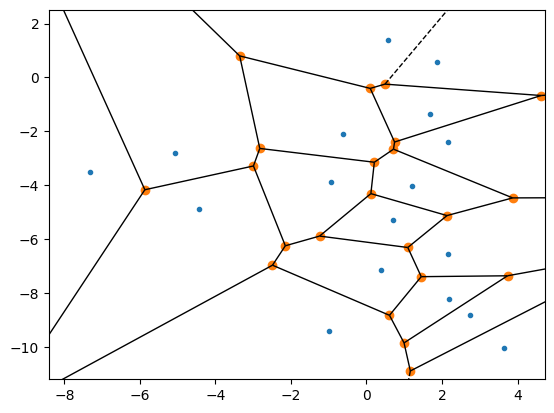

leaf_clusters 17
len(vor.point_region) 17
vor.point_region [11  9  2  3 14  6  5  0 16 10 15 12 17  8  7  4 13]
indices 11
vor.vertices[region].tolist() [[7.348271690394946, -6.443928549720327], [12.160117779648731, -4.432050272701169], [55.0397270020066, 3.8756651173274506], [-1.2423504593603143, -5.885017972738379], [1.161424922627365, -10.889429700360095]]
indices 9
vor.vertices[region].tolist() [[3.7356556862279504, -7.358257107345355], [0.9947198354224087, -9.847597679531104], [1.161424922627365, -10.889429700360095], [7.348271690394946, -6.443928549720327]]
indices 2
vor.vertices[region].tolist() [[-2.8266690475941467, -2.633738428196944], [-2.9945649503542002, -3.2839604103524302], [-5.870727059490951, -4.165972283999743], [-10.70943017731637, 10.804920154488507], [-3.359204527761485, 0.7997871983924161]]
indices 3
vor.vertices[region].tolist() [[-2.4901140211600996, -6.9653342955579545], [-9.832108929652255, -12.554832576125635], [-5.870727059490951, -4.165972283999743], [-2.99

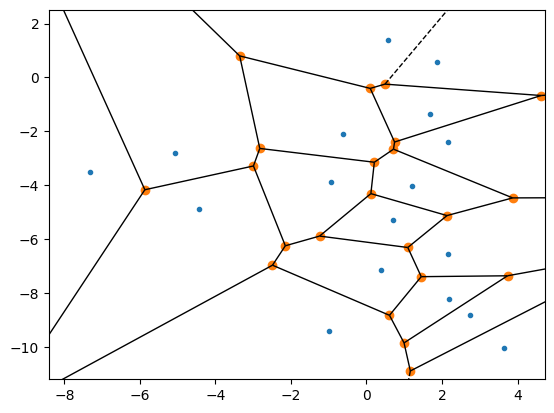

In [ ]:
# For now, it seems like d3 for computing infinite voronoi diagrams is probably the best bet because python doesn't have a library for that for some reason
# Pre-processing cluster trees to form voronoi diagram
from shapely.geometry import Polygon
from scipy.spatial import Voronoi, convex_hull_plot_2d, Delaunay
import numpy as np

# This function creates Voronoi polygons
def create_voronoi_polygons(cluster):
    leaf_clusters = []
    all_centroids = []

    # print("cluster", cluster)
    # print("cluster['content']", cluster['content'])
    # print("cluster['content'][0]", cluster['content'][0])
    def recurse(cluster):
        if isinstance(cluster['content'][0], dict):
            for subcluster in cluster['content']:
                recurse(subcluster)
        else:
            leaf_clusters.append(cluster)
            all_centroids.append([cluster['centroid_x'], cluster['centroid_y']])

    recurse(cluster)


    all_centroids = np.array(all_centroids)
    vor = Voronoi(all_centroids)
    hull = Delaunay(all_centroids)

    # testing if voronoi works properly
    import matplotlib.pyplot as plt
    fig = voronoi_plot_2d(vor)
    plt.show()
    print("leaf_clusters", len(leaf_clusters))
    print("len(vor.point_region)", len(vor.point_region))
    print("vor.point_region", vor.point_region)

    polygons = []
    for indices in vor.point_region:
        print("indices", indices)
        region = vor.regions[indices]
        print("vor.vertices[region].tolist()", vor.vertices[region].tolist())

        # TODO: risk, just not handling this and adding the vertices
        # if not region: 
        #     continue
        # if -1 in region:  # infite region that goes on forever
        #     print("region", region)
        #     polygon = hull.points[hull.convex_hull].tolist()  
        # else:
        
        polygon = vor.vertices[region].tolist()
        polygons.append(polygon)

    for i, leaf_cluster in enumerate(leaf_clusters):
        # print(polygons[i])
        leaf_cluster['polygonPoints'] = polygons[i]

    # visualie leaf_cluster polygons
    import matplotlib.pyplot as plt
    fig = voronoi_plot_2d(vor)
    plt.show()

# Main function to add polygon points to clusters
def add_polygon_points_to_clusters(cluster):
    # create Voronoi polygons for the leaf clusters
    create_voronoi_polygons(cluster)

    # This function populates polygon points up to the parent clusters
    def recurse(cluster):
        if isinstance(cluster['content'][0], dict):
            cluster['polygonPoints'] = []
            for subcluster in cluster['content']:
                recurse(subcluster)
                cluster['polygonPoints'].extend(subcluster.get('polygonPoints', []))

    recurse(cluster)

# Let's use the functions
add_polygon_points_to_clusters(trees[0])

In [ ]:
trees[0]

{'cluster_id': 100,
 'layer': 0,
 'content': [{'cluster_id': 101,
   'layer': 1,
   'content': [{'cluster_id': 104,
     'layer': 2,
     'content': [{'cluster_id': 105,
       'layer': 3,
       'content': [{'cluster_id': 107,
         'layer': 4,
         'content': [{'cluster_id': 4,
           'layer': 5,
           'content': ['7bb530adabf37316089b13690cf060c1b156b787',
            '0d3587d6d71cf7ae8e6dbfce01c29adc5cbcd569',
            '159df4c005aecff77384e075dc4baad87c4ad62f'],
           'centroid_x': 3.6326514879666667,
           'centroid_y': -10.055460929866667,
           'polygonPoints': [[7.348271690394946, -6.443928549720327],
            [12.160117779648731, -4.432050272701169],
            [55.0397270020066, 3.8756651173274506],
            [-1.2423504593603143, -5.885017972738379],
            [1.161424922627365, -10.889429700360095]]}],
         'centroid_x': 3.6326514879666667,
         'centroid_y': -10.055460929866667,
         'polygonPoints': [[7.3482716903949

In [ ]:
# Convert trees to JSON format with indentation for readability
tree_json = json.dumps(trees, indent=4, cls=Int64Encoder)

# Print the formatted tree
print(tree_json)

# Specify the file path to save the JSON data
output_file = "tree.json"

# Write the JSON data to the file
with open(output_file, "w") as file:
    json.dump(trees, file, indent=4, cls=Int64Encoder)

print("JSON file saved successfully.")

[
    {
        "cluster_id": 100,
        "layer": 0,
        "content": [
            {
                "cluster_id": 101,
                "layer": 1,
                "content": [
                    {
                        "cluster_id": 104,
                        "layer": 2,
                        "content": [
                            {
                                "cluster_id": 105,
                                "layer": 3,
                                "content": [
                                    {
                                        "cluster_id": 107,
                                        "layer": 4,
                                        "content": [
                                            {
                                                "cluster_id": 4,
                                                "layer": 5,
                                                "content": [
                                                    "7bb530adabf37316089b136

In [11]:
# PRUNING STARTS HERE
# Loading trees back in
import json

# Open the file in read mode
with open('clusters/tree_2000.json', 'r') as f:
    trees = json.load(f)  # Load the JSON data from the file

# Now, 'data' is a list of dictionaries that you can manipulate
# print(trees)

In [12]:
# Pruning the trees
def prune_single_child_clusters(cluster, depth=0):
    cluster['layer'] = depth  # Set the layer to the current depth

    # If this cluster contains sub-clusters
    if 'content' in cluster and isinstance(cluster['content'][0], dict):
        new_content = []
        for sub_cluster in cluster['content']:
            pruned = prune_single_child_clusters(sub_cluster, depth+1)
            # if the pruned sub_cluster has only one sub_cluster, replace it with its sub_cluster
            if len(pruned.get('content', [])) == 1 and isinstance(pruned['content'][0], dict):
                new_content.append(pruned['content'][0])
            else:
                new_content.append(pruned)
        cluster['content'] = new_content
    return cluster

pruned_trees = [prune_single_child_clusters(cluster) for cluster in trees]

print(json.dumps(pruned_trees, indent=4))

with open('clusters/pruned_tree_2000.json', 'w') as f:
    json.dump(pruned_trees, f, indent=4)

[
    {
        "cluster_id": 1990,
        "layer": 0,
        "content": [
            {
                "cluster_id": 1,
                "layer": 2,
                "content": [
                    "https://openalex.org/W2259938310",
                    "https://openalex.org/W2097255042",
                    "https://openalex.org/W2097259163",
                    "https://openalex.org/W2158023121",
                    "https://openalex.org/W2109034822",
                    "https://openalex.org/W2082627290",
                    "https://openalex.org/W2122910156",
                    "https://openalex.org/W2070021921",
                    "https://openalex.org/W1821918060",
                    "https://openalex.org/W2139226057",
                    "https://openalex.org/W4213354399",
                    "https://openalex.org/W1877686344",
                    "https://openalex.org/W2159821105",
                    "https://openalex.org/W2014495927",
                    "https://openal

In [ ]:
# Manually inspect simple tree
def simplify_cluster(cluster):
    # Create a new dictionary with just the cluster_id
    simple_cluster = {'cluster_id': cluster['cluster_id']}

    # If this cluster contains sub-clusters, simplify those as well
    if 'content' in cluster and isinstance(cluster['content'][0], dict):
        simple_cluster['content'] = [simplify_cluster(sub_cluster) for sub_cluster in cluster['content']]

    return simple_cluster

# Simplify each cluster in the data
simple_data = [simplify_cluster(cluster) for cluster in pruned_trees]

# Print the simplified data as a formatted JSON string
print(json.dumps(simple_data, indent=4))

with open('simple_tree.json', 'w') as f:
    json.dump(simple_data, f, indent=4)

[
    {
        "cluster_id": 100,
        "content": [
            {
                "cluster_id": 105,
                "content": [
                    {
                        "cluster_id": 4
                    },
                    {
                        "cluster_id": 10
                    }
                ]
            },
            {
                "cluster_id": 102,
                "content": [
                    {
                        "cluster_id": 2
                    },
                    {
                        "cluster_id": 110,
                        "content": [
                            {
                                "cluster_id": 1
                            },
                            {
                                "cluster_id": 16
                            },
                            {
                                "cluster_id": 14
                            },
                            {
                                "cluste

In [ ]:
# Manually inspect both papers
def get_papers_details(paper_ids, cluster_id, df):
    papers_df = df[df['paperId'].isin(paper_ids)][['paperId', 'title', 'abstract', 's2FieldsOfStudy']]
    papers_df.to_json(f'leaf_cluster_paper_inspection/papers_details_{cluster_id}.json', orient='records', indent=4)

def print_cluster_details(cluster):
    if 'content' in cluster:
        if isinstance(cluster['content'][0], dict):  # if 'content' contains clusters
            for item in cluster['content']:  # iterate over the list of clusters
                print_cluster_details(item)  # recursion call
        else:  # it's a leaf cluster
            print(cluster['cluster_id'])  # print leaf cluster id
            cluster_id = cluster['cluster_id']
            paper_ids = cluster['content']
            get_papers_details(paper_ids, cluster_id, df)
            
# Use the function like this
for cluster in trees:
    print(f"Cluster Id: {cluster['cluster_id']}")
    print_cluster_details(cluster)

Cluster Id: 100
4
10
2
1
16
14
7
0
12
3
6
9
15
8
5
13
11


# Archive

## Generate a literature review using concepts (TLDRs)

## Use knowledge base from Semantic Scholar

In [ ]:
import pandas as pd
import json

# load the data from your JSON file
with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\data_collection\output_100.json', 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# remove rows with null abstracts
df = df[df['abstract'].notna()]

# print out the DataFrame to verify
print(df.head())

                                    paperId  \
1  f15a2d21309f429fbec688b8aee5c7bdb66b8f40   
5  5b190c555003e154bb9038844899014425236273   
6  e24d6d882c78389a9c356b87ac46e065087549cf   
8  9496966a27c7a9176ec0a8ff6a04781caa42b7bb   
9  154b9fd69570539e90f51e1b19db944713d3bfdc   

                                                 url  \
1  https://www.semanticscholar.org/paper/f15a2d21...   
5  https://www.semanticscholar.org/paper/5b190c55...   
6  https://www.semanticscholar.org/paper/e24d6d88...   
8  https://www.semanticscholar.org/paper/9496966a...   
9  https://www.semanticscholar.org/paper/154b9fd6...   

                                               title  \
1  Renewable-integrated flexible carbon capture: ...   
5  Carbon capture and conversion using metal-orga...   
6  Climate change mitigation potential of carbon ...   
8  Cooperative carbon capture and steam regenerat...   
9  A Guideline for Life Cycle Assessment of Carbo...   

                                           

In [ ]:
import pandas as pd
import json

# load the data from your JSON file
with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\data_collection\output_50.json', 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# remove rows with null abstracts
# df = df[df['abstract'].notna()]
# df = df[df['tldr'].notna()]

# print out the DataFrame to verify
print(df.head())

                                     paperId  \
3   5b190c555003e154bb9038844899014425236273   
4   e24d6d882c78389a9c356b87ac46e065087549cf   
6   9496966a27c7a9176ec0a8ff6a04781caa42b7bb   
12  cfa569019717301c352aabec292a8f4d3a261553   
20  7a2197144b3a1567e814ea35fd73bd85a698681f   

                                                  url  \
3   https://www.semanticscholar.org/paper/5b190c55...   
4   https://www.semanticscholar.org/paper/e24d6d88...   
6   https://www.semanticscholar.org/paper/9496966a...   
12  https://www.semanticscholar.org/paper/cfa56901...   
20  https://www.semanticscholar.org/paper/7a219714...   

                                                title  \
3   Carbon capture and conversion using metal-orga...   
4   Climate change mitigation potential of carbon ...   
6   Cooperative carbon capture and steam regenerat...   
12  Performance-Based Screening of Porous Material...   
20  In silico discovery of covalent organic framew...   

                         

In [ ]:
# Get the first row of the DataFrame
first_row = df.iloc[0]
print(first_row)

paperId                   f15a2d21309f429fbec688b8aee5c7bdb66b8f40
url              https://www.semanticscholar.org/paper/f15a2d21...
title            Renewable-integrated flexible carbon capture: ...
abstract         To decarbonize electricity grids, CO2 capture ...
year                                                          2021
citationCount                                                   28
isOpenAccess                                                 False
fieldsOfStudy                              [Environmental Science]
embedding        {'model': 'specter@v0.1.1', 'vector': [-1.3025...
tldr                                                          None
Name: 0, dtype: object


In [ ]:
# Get the shape of the DataFrame
num_rows, num_cols = df.shape
print(f"The dataframe has {num_rows} rows and {num_cols} columns.")


The dataframe has 59 rows and 13 columns.


In [ ]:
# Have GPT3.5 generate a literature review of carbon capture using the TLDRs (significance)
%load_ext dotenv
%dotenv
import os
openai_api_key = os.getenv('OPENAI_API_KEY')
import openai

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [ ]:
# for bulk openai message, no stream
def chat_openai(prompt="Tell me to ask you a prompt", chat_history=[]):
    # define message conversation for model
    if chat_history:
        messages = chat_history
    else:
        messages = [
            {"role": "system", "content": "You are a helpful assistant."},
        ]
    messages.append({"role": "user", "content": prompt})

    # create the chat completion
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
    )
    text_answer = completion["choices"][0]["message"]["content"]

    # updated conversation history
    messages.append({"role": "assistant", "content": text_answer})

    return text_answer, messages

## Generating Topic Metadata from S2FieldsOfStudy

In [ ]:
# Print the top 10 words for each topic
for i in range(lda.num_topics):
    print(f"Topic {i}:")
    for word, prob in lda.show_topic(i, topn=10):
        print(f"  {word}: {prob}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import textwrap
from adjustText import adjust_text

In [ ]:
df.head()

paperId  \
0  17a3eb5c5fe7d6d90cde7098b5fceead18ae2d33   
1  f15a2d21309f429fbec688b8aee5c7bdb66b8f40   
2  a4830bc41a88ee369f08c0556360c12cf887f564   
3  ecacc2f192e4b881ca95749821b9d8595a81477b   
4  9a722f9ec3bca95b5f86b501706d040dc968472d   

                                                 url  \
0  https://www.semanticscholar.org/paper/17a3eb5c...   
1  https://www.semanticscholar.org/paper/f15a2d21...   
2  https://www.semanticscholar.org/paper/a4830bc4...   
3  https://www.semanticscholar.org/paper/ecacc2f1...   
4  https://www.semanticscholar.org/paper/9a722f9e...   

                                               title  \
0  Carbon capture and storage at the end of a los...   
1  Renewable-integrated flexible carbon capture: ...   
2  Recent advances in carbon capture storage and ...   
3                         Atmospheric Carbon Capture   
4  Carbon mineralization pathways for carbon capt...   

                                            abstract  year  citationCount  \
0                                               None  2021             51   
1  To decarbonize electricity grids, CO2 capture ...  2021             28   
2                                               None  2020            206   
3                                               None  2022              0   
4                                               None  2021             28   

   isOpenAccess            fieldsOfStudy  \
0          True                     None   
1         False  [Environmental Science]   
2          True      [Materials Science]   
3         False                     None   
4          True               [Medicine]   

                                     s2FieldsOfStudy  \
0  [{'category': 'Engineering', 'source': 's2-fos...   
1  [{'category': 'Environmental Science', 'source...   
2  [{'category': 'Materials Science', 'source': '...   
3  [{'category': 'Environmental Science', 'source...   
4  [{'category': 'Medicine', 'source': 'external'...   

                                           embedding  tldr  \
0  {'model': 'specter@v0.1.1', 'vector': [-0.3693...  None   
1  {'model': 'specter@v0.1.1', 'vector': [-1.3025...  None   
2  {'model': 'specter@v0.1.1', 'vector': [4.65861...  None   
3  {'model': 'specter@v0.1.1', 'vector': [2.25967...  None   
4  {'model': 'specter@v0.1.1', 'vector': [3.95449...  None   

                                           citations  \
0  [{'paperId': '0fbc075056e6f013959529ebd322e9c7...   
1  [{'paperId': '0fbc075056e6f013959529ebd322e9c7...   
2  [{'paperId': '41fb6867c18f3e3a8ca70e8ce9388c51...   
3                                                 []   
4  [{'paperId': 'cdf54c05ca1e314605992c5639c28a45...   

                                          references         x          y  \
0  [{'paperId': '979676198e622a6c39daefcb08f88c94...  3.260468  -8.768986   
1  [{'paperId': 'ebceec9a3f0187faf186697ff05450c5...  3.993077  -7.075522   
2  [{'paperId': '965050bb8475801dfcfd49509a529aa1...  1.354568 -11.164637   
3                                                 []  2.523121  -6.680912   
4  [{'paperId': '9c96e28b7a2e5a312b203df19a8a515d... -4.000884  -4.188164   

   citationCount_normalized  
0                  0.993184  
1                  0.545278  
2                  4.011685  
3                  0.000000  
4                  0.545278

In [ ]:
# Trying to

In [ ]:
# Collect list of all s2FieldsOfStudy topics, corresponding PaperIds, and citation counts, and the centroid x and y values
import pandas as pd
from collections import defaultdict

# Assuming df is your DataFrame
topic_data = defaultdict(lambda: {"paperIds": [], "citationCount": 0, "xSum": 0, "ySum": 0, "count": 0})

for index, row in df.iterrows():
    for category_info in row['s2FieldsOfStudy']:
        # Get category
        category = category_info['category']
        
        # Prevent duplicates
        if category_info['source'] == 's2-fos-model':
            # Check if paperId already counted for this category
            if row['paperId'] not in topic_data[category]["paperIds"]:
                # Add paper id to category
                topic_data[category]["paperIds"].append(row['paperId'])
            
                # Cumulative citation count
                topic_data[category]["citationCount"] += row['citationCount']
                
                # Sum x and y for the average
                topic_data[category]["xSum"] += row['x']
                topic_data[category]["ySum"] += row['y']
                topic_data[category]["count"] += 1

# Compute the average x and y for each category
for category in topic_data:
    topic_data[category]["x"] = topic_data[category]["xSum"] / topic_data[category]["count"]
    topic_data[category]["y"] = topic_data[category]["ySum"] / topic_data[category]["count"]
    
    # Remove unnecessary keys
    del topic_data[category]["xSum"]
    del topic_data[category]["ySum"]
    del topic_data[category]["count"]

# Convert topic_data to DataFrame
topic_df = pd.DataFrame.from_dict(topic_data, orient='index').reset_index()

# Rename 'index' column to 'Topic'
topic_df.rename(columns={'index': 'topic'}, inplace=True)

In [ ]:
topic_df.head()

# Exporting dataframe with T-SNE coordinates
topic_df.to_json('topic_100_tsne.json', orient='records')
topic_df


topic  \
0                      Engineering   
1            Environmental Science   
2                Materials Science   
3                          Geology   
4                        Chemistry   
5                Political Science   
6   Agricultural And Food Sciences   
7                          Biology   
8                        Economics   
9                         Business   
10                Computer Science   

                                             paperIds  citationCount  \
0   [17a3eb5c5fe7d6d90cde7098b5fceead18ae2d33, f15...           4662   
1   [f15a2d21309f429fbec688b8aee5c7bdb66b8f40, eca...           5825   
2   [a4830bc41a88ee369f08c0556360c12cf887f564, 949...           1153   
3   [9a722f9ec3bca95b5f86b501706d040dc968472d, 76a...            179   
4   [5b190c555003e154bb9038844899014425236273, d3b...           2008   
5   [032b4c8ab4fed659a272afa49b821b4c6e6c19b1, 0d3...            168   
6   [522986777b3989c34f0ea37a35e1c4f4fb3d65c8, f46...            382   
7   [e02f812df3cd677ec931b0ce47e10640f16968fa, ada...           5367   
8   [be026181508eca3fc0ce54bb3571f4fdbc014a8b, 79d...            181   
9   [bfd53c8c02171b75dba1ffa1298b59a0b027d298, b12...             96   
10  [a747814dc1c674fe172b9bec5315da5fafd57060, 56b...            271   

           x         y  
0   0.147016 -4.328206  
1   1.150427 -5.978143  
2  -0.141871 -1.268721  
3  -3.053267 -4.183675  
4  -0.195737 -1.508678  
5   2.191850 -9.891721  
6   2.302908 -1.214205  
7  -2.969524 -2.371825  
8   2.885105 -8.375927  
9  -0.648677 -6.448681  
10  0.756752 -6.018582

In [ ]:
# Preprocessing for SPECTRE API
SAMPLE_TOPICS = []

for i, topic in enumerate(topic_data.keys(), start=1):
    topic_dict = {
        "paper_id": topic,
        "title": topic,
        "abstract": topic
    }
    SAMPLE_TOPICS.append(topic_dict)

SAMPLE_TOPICS

[{'paper_id': 'Engineering',
  'title': 'Engineering',
  'abstract': 'Engineering'},
 {'paper_id': 'Environmental Science',
  'title': 'Environmental Science',
  'abstract': 'Environmental Science'},
 {'paper_id': 'Chemistry', 'title': 'Chemistry', 'abstract': 'Chemistry'},
 {'paper_id': 'Materials Science',
  'title': 'Materials Science',
  'abstract': 'Materials Science'},
 {'paper_id': 'Geology', 'title': 'Geology', 'abstract': 'Geology'},
 {'paper_id': 'Agricultural And Food Sciences',
  'title': 'Agricultural And Food Sciences',
  'abstract': 'Agricultural And Food Sciences'},
 {'paper_id': 'Biology', 'title': 'Biology', 'abstract': 'Biology'},
 {'paper_id': 'Economics', 'title': 'Economics', 'abstract': 'Economics'},
 {'paper_id': 'Business', 'title': 'Business', 'abstract': 'Business'},
 {'paper_id': 'Computer Science',
  'title': 'Computer Science',
  'abstract': 'Computer Science'}]

In [ ]:
# Need to create SPECTRE em beddings for all the s2FieldsOfStudy
from typing import Dict, List
import json

import requests


URL = "https://model-apis.semanticscholar.org/specter/v1/invoke"
MAX_BATCH_SIZE = 16


def chunks(lst, chunk_size=MAX_BATCH_SIZE):
    """Splits a longer list to respect batch size"""
    for i in range(0, len(lst), chunk_size):
        yield lst[i : i + chunk_size]


SAMPLE_PAPERS = [
    {
        "paper_id": "A",
        "title": "Angiotensin-converting enzyme 2 is a functional receptor for the SARS coronavirus",
        "abstract": "Spike (S) proteins of coronaviruses ...",
    },
    {
        "paper_id": "B",
        "title": "Hospital outbreak of Middle East respiratory syndrome coronavirus",
        "abstract": "Between April 1 and May 23, 2013, a total of 23 cases of MERS-CoV ...",
    },
]


def embed(papers):
    embeddings_by_paper_id: Dict[str, List[float]] = {}

    for chunk in chunks(papers):
        # Allow Python requests to convert the data above to JSON
        response = requests.post(URL, json=chunk)

        if response.status_code != 200:
            raise RuntimeError("Sorry, something went wrong, please try later!")

        for paper in response.json()["preds"]:
            embeddings_by_paper_id[paper["paper_id"]] = paper["embedding"]

    return embeddings_by_paper_id


# if __name__ == "__main__":
all_embeddings = embed(SAMPLE_TOPICS)

# Prints { 'A': [4.089589595794678, ...], 'B': [-0.15814849734306335, ...] }
print(len(all_embeddings))
print(len(df['embedding']))

10
59


In [ ]:
# Add all_embeddings to new df and then run T-SNE
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import textwrap
from adjustText import adjust_text

In [ ]:
# Convert all_embeddings values to a list of lists
all_embeddings_list = list(all_embeddings.values())

# Convert df['embedding'] to a list of lists
df_embeddings = df['embedding'].apply(lambda x: x['vector']).tolist()

# Stack them together
combined_embeddings = np.vstack([df_embeddings, all_embeddings_list])

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(combined_embeddings)


In [ ]:
len(df)

59

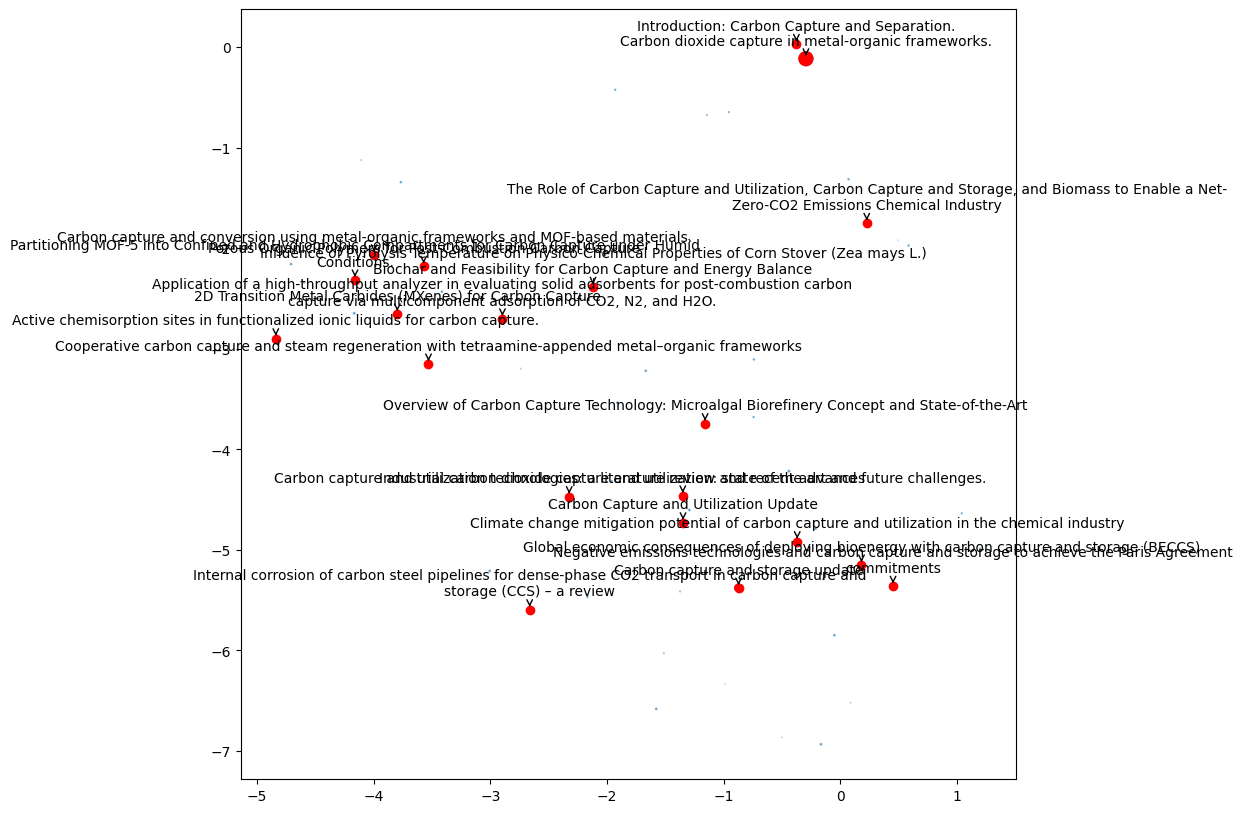

In [ ]:
# Add the 2D t-SNE coordinates to the papers DataFrame and normalize citationCount for node sizes
df['x'] = embeddings_2d[:len(df), 0]
df['y'] = embeddings_2d[:len(df), 1]
df['citationCount_normalized'] = (df['citationCount'] - df['citationCount'].min()) / (df['citationCount'].max() - df['citationCount'].min())
df['citationCount_normalized'] = df['citationCount_normalized'] * 100  # Scale to a suitable range for scatter plot node sizes

# Sort the DataFrame based on citationCount and select the top 20
df_top20 = df.nlargest(20, 'citationCount')

# Create a scatter plot of all the points with node sizes based on normalized citationCount
plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], s=df['citationCount_normalized'], alpha=0.5, label='All papers')

# Highlight the top 20 papers in the plot with node sizes based on normalized citationCount
plt.scatter(df_top20['x'], df_top20['y'], s=df_top20['citationCount_normalized'], color='red', label='Top 20 papers')

# Prepare to add titles of the top 20 papers to the plot with text wrapping
texts = []
for i, row in df_top20.iterrows():
    title_wrapped = textwrap.fill(row['title'], width=100)  # Wrap text after 20 characters
    plt.scatter(row['x'], row['y'], color='red')  # This will ensure the dot is above the line
    texts.append(plt.annotate(title_wrapped, (row['x'], row['y']), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(arrowstyle="->")))

# Exporting dataframe with T-SNE coordinates
df.to_json('output_100_tsne.json', orient='records')

In [ ]:
# Add x and y coordinates for topics

topic_df['x'] = embeddings_2d[len(df):, 0]
topic_df['y'] = embeddings_2d[len(df):, 1]
# topic_df['citationCount_normalized'] = (df['citationCount'] - df['citationCount'].min()) / (df['citationCount'].max() - df['citationCount'].min())
# topic_df['citationCount_normalized'] = df['citationCount_normalized'] * 100  # Scale to a suitable range for scatter plot node sizes

# Exporting dataframe with T-SNE coordinates
topic_df.to_json('topic_100_tsne.json', orient='records')
topic_df

topic  \
0                     Engineering   
1           Environmental Science   
2                       Chemistry   
3               Materials Science   
4                         Geology   
5  Agricultural And Food Sciences   
6                         Biology   
7                       Economics   
8                        Business   
9                Computer Science   

                                            paperIds  citationCount         x  \
0  [f15a2d21309f429fbec688b8aee5c7bdb66b8f40, e3e...            894  1.980191   
1  [f15a2d21309f429fbec688b8aee5c7bdb66b8f40, e24...           3560  1.444582   
2  [5b190c555003e154bb9038844899014425236273, 625...           1768  1.736910   
3  [9496966a27c7a9176ec0a8ff6a04781caa42b7bb, cfa...            806  1.517166   
4         [76a20bec8e313ced0faf8010e6ecbe3965a9e305]             30  1.806534   
5  [522986777b3989c34f0ea37a35e1c4f4fb3d65c8, f46...            250  1.313154   
6  [e02f812df3cd677ec931b0ce47e10640f16968fa, ada...           5195  1.862047   
7  [be026181508eca3fc0ce54bb3571f4fdbc014a8b, 79d...            181  2.060049   
8  [bfd53c8c02171b75dba1ffa1298b59a0b027d298, b12...             96  2.075108   
9  [a747814dc1c674fe172b9bec5315da5fafd57060, 56b...            271  2.011428   

          y  
0  1.181053  
1  1.283456  
2  1.107658  
3  1.357793  
4  0.941143  
5  1.825582  
6  1.170925  
7  1.219957  
8  1.180824  
9  1.583918

In [ ]:
print(tldr_texts)

['This review provides a comprehensive account of significant progress in the design and synthesis of MOF-based materials, including MOFs, MOF composites and MOF derivatives, and their application to carbon capture and conversion.', 'This study shows that CCU has the technical potential to lead to a carbon-neutral chemical industry and decouple chemical production from fossil resources, reducing annual GHG emissions by up to 3.5 Gt CO2-eq in 2030.', 'A family of robust tetraamine-functionalized frameworks that retain cooperativity are reported, leading to the potential for exceptional efficiency in capturing CO2 under the extreme conditions relevant to natural gas flue emissions.', 'The objective of this work is to review the current status of this new approach to multiscale screening, discuss its potential and impact on the field of materials screening, and highlight the challenges that limit its application.', 'A genetic algorithm is developed to tune the charge equilibration method 

In [ ]:
prompt = "I am a college student who is a beginner in carbon capture. Write a literature review of carbon capture using the TLDRs (significance) of papers: " + str(tldr_texts)

In [ ]:
res = chat_openai(prompt)

In [ ]:
res

('Carbon capture and conversion (CCU) has been identified as a potential solution to reduce global CO2 emissions. One way to achieve this is through the use of metal-organic framework-based materials (MOFs) for carbon capture. A comprehensive review of MOFs and their derivatives reveals significant progress in their design and synthesis. MOFs have great potential for application in CCU due to their high surface area, tunability, and selectivity.\n\nAnother study shows that CCU has technical potential to lead to a carbon-neutral chemical industry, reducing annual GHG emissions by up to 3.5 Gt CO2-eq by 2030. This could potentially decouple chemical production from fossil resources, crucial for mitigating climate change.\n\nA family of robust tetraamine-functionalized frameworks has been developed that effectively captures CO2 under extreme conditions. This opens up the potential for exceptional efficiency in CCU in natural gas flue emissions.\n\nThe use of genetic algorithms has facilit

In [ ]:
# Get 'tldr' column as a Series
tldr_series = df['tldr']

# Extract the 'text' from each 'tldr' dictionary in the Series
tldr_texts = [item['text'] if item is not None else None for item in tldr_series]


## Manual Inspection of Output for Manual Hierarchical Clustering

In [2]:
import json

# Load the input data
with open('t-sne/output_100_tsne.json', 'r') as infile:
    data = json.load(infile)

# Extract desired fields
new_data = []
for entry in data:
    paperId = entry.get('paperId', None)
    title = entry.get('title', None)
    abstract = entry.get('abstract', None)
    
    # Build new data entry
    if paperId is not None and title is not None and abstract is not None:
        new_data.append({
            'paperId': paperId,
            'title': title,
            # 'abstract': abstract
        })

# Write to output file
with open('t-sne/output_100_tsne_manual_inspection_id_titles_only.json', 'w') as outfile:
    json.dump(new_data, outfile, indent=4)


## Generating paper topics from title and abstract

In [70]:
import pandas as pd
import json

# load the data from your JSON file
with open(r'C:\Users\1kevi\Desktop\projects\Research\autoscious-carbon-capture\knowledge_base\t-sne\output_100_tsne.json', 'r') as f:
    data = json.load(f)

# convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# print out the DataFrame to verify
print(df.head())

                                    paperId  \
0  17a3eb5c5fe7d6d90cde7098b5fceead18ae2d33   
1  f15a2d21309f429fbec688b8aee5c7bdb66b8f40   
2  a4830bc41a88ee369f08c0556360c12cf887f564   
3  ecacc2f192e4b881ca95749821b9d8595a81477b   
4  9a722f9ec3bca95b5f86b501706d040dc968472d   

                                                 url  \
0  https://www.semanticscholar.org/paper/17a3eb5c...   
1  https://www.semanticscholar.org/paper/f15a2d21...   
2  https://www.semanticscholar.org/paper/a4830bc4...   
3  https://www.semanticscholar.org/paper/ecacc2f1...   
4  https://www.semanticscholar.org/paper/9a722f9e...   

                                               title  \
0  Carbon capture and storage at the end of a los...   
1  Renewable-integrated flexible carbon capture: ...   
2  Recent advances in carbon capture storage and ...   
3                         Atmospheric Carbon Capture   
4  Carbon mineralization pathways for carbon capt...   

                                           

In [29]:
# # Testing top 3 n-grams from title, embedding each n-gram, and then clustering each n-gram
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# import numpy as np

# # List of English stop words
# stop_words = list(stopwords.words('english'))

# # Create the transform
# vectorizer = TfidfVectorizer(ngram_range=(2,3), stop_words=stop_words)

# # Tokenize, build vocab and calculate TF-IDF
# tfidf_matrix = vectorizer.fit_transform(df['text'])

In [31]:
# # Define a function to extract top 3 words with the highest TF-IDF score in a given document
# def top_words(doc_index):
#     feature_index = tfidf_matrix[doc_index,:].nonzero()[1]
#     tfidf_scores = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
    
#     # Corresponding feature names and scores
#     words_scores = [(vectorizer.get_feature_names_out() [i], s) for (i, s) in tfidf_scores]
#     words_scores = sorted(words_scores, key = lambda x: x[1], reverse=True)
    
#     return words_scores

In [32]:
# # Apply the function to each row index in the dataframe
# df['top_words'] = [top_words(i) for i in range(tfidf_matrix.shape[0])]

In [33]:
# df[['title', 'text', 'top_words']]
# df[['title', 'text', 'top_words']].to_json('topics/top_words.json', orient='records', lines=True, indent=2)

In [ ]:
# # Testing reranking of words based on similarity to document embedding via specter & ada

# from transformers import AutoTokenizer, AutoModel
# import torch

# # models
# EMBEDDING_MODEL = "text-embedding-ada-002"

# tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
# model = AutoModel.from_pretrained('allenai/specter')

# def calculate_embedding(text):
#     inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
#     with torch.no_grad():
#         return model(**inputs)[0].mean(dim=1).numpy()

# # Calculate document embeddings
# # df['document_embedding'] = df['text'].apply(calculate_embedding)


In [ ]:
# # Exploring LDA2Vec
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from lda2vec import LDA2Vec
# from transformers import AutoTokenizer, AutoModel
# import torch
# import numpy as np

# # Load your data
# df = pd.read_csv('your_data.csv')

# # Preprocess your text data
# # This step will depend on the specifics of your data
# # For example, you might need to remove stop words, perform lemmatization, etc.

# # Set up SPECTER model for embeddings
# tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
# model = AutoModel.from_pretrained('allenai/specter')

# def calculate_embedding(text):
#     inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
#     with torch.no_grad():
#         return model(**inputs)[0].mean(dim=1).numpy()

# # Generate word embeddings using SPECTER
# df['embeddings'] = df['text'].apply(calculate_embedding)

# # Prepare data for LDA2Vec
# # This involves creating a count matrix of your text data
# vectorizer = CountVectorizer()
# counts = vectorizer.fit_transform(df['text'])

# # Create an LDA2Vec model
# lda2vec = LDA2Vec(n_topics=20, n_words=10000)

# # Fit the LDA2Vec model
# lda2vec.fit(counts, df['embeddings'].tolist())

# # Now you can use the lda2vec model to explore topics in your text
# # For example, you can look at the most common words in each topic


In [55]:
# # Trying Guided LDA
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.cluster import KMeans
# from transformers import AutoTokenizer, AutoModel
# import torch
# import pandas as pd
# import numpy as np
# from nltk.util import ngrams
# import nltk
# nltk.download('stopwords')

# # Initialize SPECTER model
# tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
# model = AutoModel.from_pretrained('allenai/specter')

# # Function to calculate embeddings
# def calculate_embedding(text):
#     inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
#     with torch.no_grad():
#         return model(**inputs)[0].mean(dim=1).numpy()

# # Calculate document embeddings
# # df['document_embedding'] = df['text'].apply(calculate_embedding)

# # Tokenize text and create bigrams

# # Load the set of English stop words
# stop_words = set(stopwords.words('english'))

# df['tokens'] = df['text'].apply(lambda x: [word for word in x.split() if word not in stop_words])
# df['bigrams'] = df['tokens'].apply(lambda x: [' '.join(gram) for gram in ngrams(x, 2) if all(word not in stop_words for word in gram)])

# unique_tokens = pd.Series([item for sublist in df['tokens'].tolist() for item in sublist]).unique()
# unique_bigrams = pd.Series([item for sublist in df['bigrams'].tolist() for item in sublist]).unique()

# word_embeddings = {word: calculate_embedding(word) for word in unique_tokens}
# bigram_embeddings = {bigram: calculate_embedding(bigram) for bigram in unique_bigrams}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1kevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# word_embeddings = {word: word_embeddings[word].reshape(1, -1) for word in word_embeddings}
# bigram_embeddings = {bigram: bigram_embeddings[bigram].reshape(1, -1) for bigram in bigram_embeddings}

# print(word_embeddings['carbon'].shape)
# print(bigram_embeddings['carbon capture'].shape)

(1, 768)
(1, 768)


In [64]:
# # Cluster words and bigrams based on embeddings
# # Cluster words and bigrams based on embeddings
# word_clusters = KMeans(n_clusters=20).fit(np.array(list(word_embeddings.values())).reshape(-1, 768))
# bigram_clusters = KMeans(n_clusters=20).fit(np.array(list(bigram_embeddings.values())).reshape(-1, 768))


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:

# # Create seed topics based on clusters
# seed_topics = {word: word_clusters.labels_[i] for i, word in enumerate(word_embeddings.keys())}
# seed_topics.update({bigram: bigram_clusters.labels_[i] for i, bigram in enumerate(bigram_embeddings.keys())})

In [ ]:
# print(seed_topics)
# # Need to verify if the topics and words under them are even good.

In [67]:
# seed_topics_grouped = {}

# for word, topic in seed_topics.items():
#     if topic in seed_topics_grouped:
#         seed_topics_grouped[topic].append(word)
#     else:
#         seed_topics_grouped[topic] = [word]


In [ ]:
# seed_topics_grouped

In [51]:
# from numpy import dot
# from numpy.linalg import norm

# def cosine_similarity(a, b):
#     a = a.flatten()  # Add this line
#     b = b.flatten()  # Add this line
#     return dot(a, b) / (norm(a) * norm(b))


In [ ]:
# # Running GuidedLDA
# from guidedlda import GuidedLDA

# # Vectorize your text data
# vectorizer = CountVectorizer(vocabulary=seed_topics.keys())
# X = vectorizer.fit_transform(df['text'])

# # Create a seed topics matrix
# seed_topics_matrix = np.zeros((40, len(seed_topics)))

# for word, topic in seed_topics.items():
#     seed_topics_matrix[topic, vectorizer.vocabulary_[word]] = 1

# # Run Guided LDA
# model = GuidedLDA(n_topics=40, n_iter=100, random_state=7, refresh=20)
# model.fit(X, seed_topics=seed_topics_matrix)

# # Get the topic-word and document-topic distributions
# topic_word_distributions = model.topic_word_
# document_topic_distributions = model.transform(X)

In [40]:
# def get_top_words_spectre(row):
#     # Get the document embedding and flatten it
#     document_embedding = row['document_embedding_ada'].flatten()
    
#     top_words_spectre = []
#     for word, _ in row['top_words']:
#         word_embedding = calculate_embedding(word)
#         word_embedding = word_embedding.flatten()  # Flatten the word embedding
#         similarity = cosine_similarity(word_embedding, document_embedding)
#         top_words_spectre.append((word, similarity))
    
#     # Sort the words by their similarity to the document embedding
#     top_words_spectre.sort(key=lambda x: x[1], reverse=True)
    
#     return top_words_spectre

In [41]:
# # 21 min on 100 papers and all their n grams
# df['top_words_spectre'] = df.apply(get_top_words_spectre, axis=1)

In [42]:

# df[['title', 'text', 'top_words_spectre']].to_json('topics/top_words_spectre.json', orient='records', lines=True, indent=2)

In [ ]:
# # Use an embedding to transform each of these words? 
# from sentence_transformers import SentenceTransformer
# import numpy as np

# model = SentenceTransformer('sentence-transformers/miniLM-L6-H384-uncased')

# # Assume 'top_words' is a list of your top words for each paper
# top_words = ['carbon', 'capture', 'storage', 'renewable', 'energy']

# word_embeddings = {}
# for word in top_words:
#     word_embeddings[word] = model.encode([word])[0]

# # Now 'word_embeddings' is a dictionary that maps words to their corresponding embeddings

In [72]:
df.head()

paperId  \
0  17a3eb5c5fe7d6d90cde7098b5fceead18ae2d33   
1  f15a2d21309f429fbec688b8aee5c7bdb66b8f40   
2  a4830bc41a88ee369f08c0556360c12cf887f564   
3  ecacc2f192e4b881ca95749821b9d8595a81477b   
4  9a722f9ec3bca95b5f86b501706d040dc968472d   

                                                 url  \
0  https://www.semanticscholar.org/paper/17a3eb5c...   
1  https://www.semanticscholar.org/paper/f15a2d21...   
2  https://www.semanticscholar.org/paper/a4830bc4...   
3  https://www.semanticscholar.org/paper/ecacc2f1...   
4  https://www.semanticscholar.org/paper/9a722f9e...   

                                               title  \
0  Carbon capture and storage at the end of a los...   
1  Renewable-integrated flexible carbon capture: ...   
2  Recent advances in carbon capture storage and ...   
3                         Atmospheric Carbon Capture   
4  Carbon mineralization pathways for carbon capt...   

                                            abstract  year  citationCount  \
0                                               None  2021             51   
1  To decarbonize electricity grids, CO2 capture ...  2021             28   
2                                               None  2020            206   
3                                               None  2022              0   
4                                               None  2021             28   

   isOpenAccess            fieldsOfStudy  \
0          True                     None   
1         False  [Environmental Science]   
2          True      [Materials Science]   
3         False                     None   
4          True               [Medicine]   

                                     s2FieldsOfStudy  \
0  [{'category': 'Engineering', 'source': 's2-fos...   
1  [{'category': 'Environmental Science', 'source...   
2  [{'category': 'Materials Science', 'source': '...   
3  [{'category': 'Environmental Science', 'source...   
4  [{'category': 'Medicine', 'source': 'external'...   

                                           embedding  tldr  \
0  {'model': 'specter@v0.1.1', 'vector': [-0.3693...  None   
1  {'model': 'specter@v0.1.1', 'vector': [-1.3025...  None   
2  {'model': 'specter@v0.1.1', 'vector': [4.65861...  None   
3  {'model': 'specter@v0.1.1', 'vector': [2.25967...  None   
4  {'model': 'specter@v0.1.1', 'vector': [3.95449...  None   

                                           citations  \
0  [{'paperId': '0fbc075056e6f013959529ebd322e9c7...   
1  [{'paperId': '0fbc075056e6f013959529ebd322e9c7...   
2  [{'paperId': '41fb6867c18f3e3a8ca70e8ce9388c51...   
3                                                 []   
4  [{'paperId': 'cdf54c05ca1e314605992c5639c28a45...   

                                          references         x          y  \
0  [{'paperId': '979676198e622a6c39daefcb08f88c94...  3.260468  -8.768986   
1  [{'paperId': 'ebceec9a3f0187faf186697ff05450c5...  3.993077  -7.075522   
2  [{'paperId': '965050bb8475801dfcfd49509a529aa1...  1.354568 -11.164637   
3                                                 []  2.523121  -6.680912   
4  [{'paperId': '9c96e28b7a2e5a312b203df19a8a515d... -4.000884  -4.188164   

   citationCount_normalized  
0                  0.993184  
1                  0.545278  
2                  4.011685  
3                  0.000000  
4                  0.545278

In [73]:
# Using GPT3.5 to generate topics

# imports
%load_ext dotenv
%dotenv
import os
# openai_api_key = os.getenv('OPENAI_API_KEY')
openai_api_key = os.getenv('OPENAI_GPT4_API_KEY')
import openai

# models
EMBEDDING_MODEL = "text-embedding-ada-002"
GPT_MODEL = "gpt-3.5-turbo"
# GPT_MODEL = "gpt-4"

# for bulk openai message, no stream
def chat_openai(prompt="Tell me to ask you a prompt", chat_history=[]):
    # define message conversation for model
    if chat_history:
        messages = chat_history
    else:
        messages = [
            {"role": "system", "content": "You are ChatGPT, a large language model trained by OpenAI. Answer as concisely as possible."},
        ]
    messages.append({"role": "user", "content": prompt})

    # create the chat completion
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0
    )
    text_answer = completion["choices"][0]["message"]["content"]

    # updated conversation history
    messages.append({"role": "assistant", "content": text_answer})

    return text_answer, messages

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [163]:
# existing_themes = 'Renewable integration, carbon capture, Clean energy transition, Operational flexibility, Cost-effective CO2 reduction, carbon storage, lost decade'

# paper = "titled '" + df.iloc[0]["title"] + "'"
# if df.iloc[0]["abstract"]:
#     paper += "with the following abstract: " + df.iloc[0]["abstract"]

# prompt = f'''
# Paper: {paper} \n Task: Given the paper title and abstract above, determine at most 5 themes for a researcher whose goal is to eventually make impactful discoveries and experiments. \n Rules: Do not output any theme that is beyond what is given in the paper. Be as concise (less than 5 words), clear, and correct as possible. Do not make up anything not apparent from the paper. \n Use themes from other papers only if the paper mentions them: {existing_themes}. 

# Your output should be of the following format: Theme1, Theme2, Theme3, Theme4, Theme5
# '''

## Archive t-sne & LDA testing

In [ ]:
# # Use adjust_text to automatically adjust the positions of the text labels
# adjust_text(texts)

# plt.title('t-SNE visualization of embedding vectors')
# plt.legend()
# plt.show()

In [ ]:
# # Working implementation of t-SNE?

# # Add the 2D t-SNE coordinates to the DataFrame and normalize citationCount for node sizes
# df['x'] = embeddings_2d[:, 0]
# df['y'] = embeddings_2d[:, 1]
# df['citationCount_normalized'] = (df['citationCount'] - df['citationCount'].min()) / (df['citationCount'].max() - df['citationCount'].min())
# df['citationCount_normalized'] = df['citationCount_normalized'] * len(df)  # Scale to a suitable range for scatter plot node sizes

# # Sort the DataFrame based on citationCount and select the top 20
# df_top20 = df.nlargest(10, 'citationCount')

# # Create a scatter plot of all the points with node sizes based on normalized citationCount
# plt.figure(figsize=(10, 10))
# plt.scatter(df['x'], df['y'], s=df['citationCount_normalized'], alpha=0.5, label='All papers')

# # Highlight the top 20 papers in the plot with node sizes based on normalized citationCount
# top20_scatter = plt.scatter(df_top20['x'], df_top20['y'], s=df_top20['citationCount_normalized'], color='red')

# # Prepare to add titles of the top 20 papers to the plot with text wrapping
# texts = []
# for i, row in df_top20.iterrows():
#     title_wrapped = textwrap.fill(row['title'], width=20)  # Wrap text after 20 characters
#     plt.scatter(row['x'], row['y'], color='red')  # This will ensure the dot is above the line
#     texts.append(plt.annotate(title_wrapped, (row['x'], row['y']), textcoords="offset points", xytext=(0,10), ha='center', arrowprops=dict(arrowstyle="->")))

# # Use adjust_text to automatically adjust the positions of the text labels
# adjust_text(texts)

# plt.title('t-SNE visualization of embedding vectors')
# plt.legend(handles=[top20_scatter], labels=['Top 20 papers'])
# plt.show()

In [ ]:
# # attempting hierarchical clustering with LDA
# import pandas as pd
# from gensim.corpora import Dictionary
# from gensim.models import LdaModel
# from gensim.utils import simple_preprocess
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Download the set of stop words the first time
# import nltk
# nltk.download('stopwords')

# # Load the set of English stop words
# stop_words = set(stopwords.words('english'))

# # Assume that 'documents' is your list of documents. 
# # Each document is a string of words.

# # Preprocess your documents
# documents = df['abstract'].apply(simple_preprocess)

# # Tokenize the documents into words, convert to lower case, 
# # and remove stop words
# filtered_documents = []
# for doc in documents:
#     word_tokens = doc
#     filtered_document = [word for word in word_tokens if word not in stop_words]
#     filtered_documents.append(filtered_document)

# # Create a gensim dictionary from the documents
# dictionary = Dictionary(filtered_documents)

# # Create a corpus for LDA
# corpus = [dictionary.doc2bow(doc) for doc in documents]

# # Fit an LDA model
# lda = LdaModel(corpus, num_topics=20, id2word=dictionary, alpha='auto', eta='auto')

# # Print the top words for each topic
# for i in range(10):
#     print(f"Topic {i+1}:")
#     print([dictionary[word_id] for word_id, prob in lda.get_topic_terms(i, topn=10)])

In [ ]:
# # Get the topic-document distribution from the LDA model
# topic_dist = [lda.get_document_topics(bow, minimum_probability=0) for bow in corpus]

# # Convert the topic distributions to a 2D array
# topic_dist_array = np.zeros((len(corpus), lda.num_topics))
# for i in range(len(corpus)):
#     for topic, prob in topic_dist[i]:  # topic_dist[i] is a list of tuples
#         topic_dist_array[i, topic] = prob  # topic is an integer (the topic ID)

# # Perform hierarchical clustering on the topic-document distribution
# cluster = AgglomerativeClustering(n_clusters=5)
# cluster_labels = cluster.fit_predict(topic_dist_array)